In [ ]:
import pandas as pd
import numpy as np
#from google.colab import drive
from web3 import Web3
from tqdm import tqdm
import ast #eval() to interpret code
import json
import matplotlib.pyplot as plt

# Functions

In [15]:
def abi_contract(path_file):
  json_abi = open(path_file, 'r').read()
  w3 = Web3()
  contract = w3.eth.contract(abi=json_abi)
  return contract

In [16]:
def decode(tx_input):

    index = ['fn_name', 'args', 'timestamp','block_number','transaction_index','trace_address','transaction_hash']
    
    result = contract.decode_function_input(tx_input['input']) #tuple
    fn_name = result[0].fn_name #function name 
    fn_args = result[1]

    block_timestamp = tx_input['block_timestamp']
    block_number = tx_input['block_number']
    transaction_index = tx_input['transaction_index']
    trace_address = tx_input['trace_address']
    transaction_hash = tx_input['transaction_hash']

    return pd.Series(data=(fn_name, fn_args, block_timestamp, block_number,
                           transaction_index, trace_address, transaction_hash), 
                     index=index)

# Data processing

In [17]:
!pwd

/mnt/SSD/mikhail.evdokimov/mikhailev/miniconda3/michaelpyenv/bin


In [18]:
path_file = "/mnt/SSD/mikhail.evdokimov/mikhailev/miniconda3/michaelpyenv/bin/michael.evdokimov/Coursework/MCD-Vat.txt"
contract = abi_contract(path_file)

In [19]:
df= pd.read_csv('/mnt/SSD/mikhail.evdokimov/mikhailev/miniconda3/michaelpyenv/bin/michael.evdokimov/Coursework/df_2022.csv')
df.columns

Index(['Unnamed: 0', 'index', 'block_timestamp', 'block_number',
       'transaction_index', 'trace_address', 'transaction_hash', 'input',
       'trace_addr_str'],
      dtype='object')

In [20]:
df1 = df
df1 = df1.drop(labels=['Unnamed: 0', 'index'], axis=1)
df1 = df1.sort_values(by=['block_number', 'transaction_index', 'trace_addr_str'])
df1 = df1.reset_index()

In [21]:
tqdm.pandas()
res = df1.progress_apply(decode, axis=1)
res

100%|██████████| 319405/319405 [09:46<00:00, 544.90it/s]


fn_name                                               args  \
0         file  {'ilk': b'ETH-A\x00\x00\x00\x00\x00\x00\x00\x0...   
1         file  {'ilk': b'WBTC-A\x00\x00\x00\x00\x00\x00\x00\x...   
2         file  {'ilk': b'MANA-A\x00\x00\x00\x00\x00\x00\x00\x...   
3         file  {'ilk': b'COMP-A\x00\x00\x00\x00\x00\x00\x00\x...   
4         file  {'ilk': b'LINK-A\x00\x00\x00\x00\x00\x00\x00\x...   
...        ...                                                ...   
319400    move  {'src': '0x89B78CfA322F6C5dE0aBcEecab66Aee4539...   
319401    slip  {'ilk': b'PSM-USDC-A\x00\x00\x00\x00\x00\x00\x...   
319402    frob  {'i': b'PSM-USDC-A\x00\x00\x00\x00\x00\x00\x00...   
319403    move  {'src': '0x89B78CfA322F6C5dE0aBcEecab66Aee4539...   
319404    move  {'src': '0x89B78CfA322F6C5dE0aBcEecab66Aee4539...   

                      timestamp  block_number  transaction_index  \
0       2022-01-01 00:01:05 UTC      13916172                135   
1       2022-01-01 00:01:05 UTC      13916172                135   
2       2022-01-01 00:01:05 UTC      13916172                135   
3       2022-01-01 00:01:05 UTC      13916172                135   
4       2022-01-01 00:01:05 UTC      13916172                135   
...                         ...           ...                ...   
319400  2022-06-22 23:37:04 UTC      15010120                 63   
319401  2022-06-22 23:45:51 UTC      15010157                280   
319402  2022-06-22 23:45:51 UTC      15010157                280   
319403  2022-06-22 23:45:51 UTC      15010157                280   
319404  2022-06-22 23:45:51 UTC      15010157                280   

       trace_address                                   transaction_hash  
0               16,1  0x1419e09967dad9e4c9588d5b00a199a54dc7d1347a04...  
1               17,1  0x1419e09967dad9e4c9588d5b00a199a54dc7d1347a04...  
2               18,1  0x1419e09967dad9e4c9588d5b00a199a54dc7d1347a04...  
3               19,1  0x1419e09967dad9e4c9588d5b00a199a54dc7d1347a04...  
4               20,1  0x1419e09967dad9e4c9588d5b00a199a54dc7d1347a04...  
...              ...                                                ...  
319400    0,11,1,3,0  0x7a9fcacf875c233d1780b641c290815553dd87a2e531...  
319401       1,1,0,0  0x451eae97f1834f92de032f2c6e1ba9c8eaf9b95b74d3...  
319402         1,1,1  0x451eae97f1834f92de032f2c6e1ba9c8eaf9b95b74d3...  
319403         1,1,2  0x451eae97f1834f92de032f2c6e1ba9c8eaf9b95b74d3...  
319404       1,1,3,0  0x451eae97f1834f92de032f2c6e1ba9c8eaf9b95b74d3...  

[319405 rows x 7 columns]

In [ ]:
pd.DataFrame(res).to_csv('/mnt/SSD/mikhail.evdokimov/mikhailev/miniconda3/michaelpyenv/bin/michael.evdokimov/Coursework/res-df_2022.csv')

## Split args

In [23]:
usr, ilk, wad, i, u, v, w = None, None, None, None, None, None, None
dink, dart, src, dst, rad, what, data = None, None, None, None, None, None, None

cols = ['usr','ilk','wad','i','u','v','w','dink','dart','src','dst','rad','what','data']
arg = []

for index, row in tqdm(res.iterrows(), total=res.shape[0]): 
  
  for key, values in row['args'].items():

    if key == 'usr':
      usr = values
    elif key == 'ilk':
      values = str(values).replace('\\x00','').replace("b'", "'").replace("\'", "\"")
      ilk = values
    elif key == 'wad':
      wad = values
    elif key == 'i':
      values = str(values).replace('\\x00','').replace("b'", "'").replace("\'", "\"")
      i = values
    elif key == 'u':
      u = values
    elif key == 'v':
      v = values
    elif key == 'w':
      w = values
    elif key == 'dink':
      dink = values
    elif key == 'dart':
      dart = values
    elif key == 'src':
      src = values
    elif key == 'dst':
      dst = values
    elif key == 'rad':
      rad = values  
    # elif key == 'rate':
    #   rate = values  
    elif key == 'what':
      what = values
    elif key == 'data':
      data = values
       
  temp = [usr, ilk, wad, i, u, v, w, dink, dart, src, dst, rad, what, data]
  arg.append(temp)
  usr, ilk, wad, i, u, v, w = None, None, None, None, None, None, None
  dink, dart, src, dst, rad, what, data = None, None, None, None, None, None, None


100%|██████████| 319405/319405 [00:17<00:00, 18214.48it/s]


In [24]:
df = pd.DataFrame(data=arg, columns=cols)
df

usr           ilk  \
0                                             None       "ETH-A"   
1                                             None      "WBTC-A"   
2                                             None      "MANA-A"   
3                                             None      "COMP-A"   
4                                             None      "LINK-A"   
...                                            ...           ...   
319400                                        None          None   
319401  0x89B78CfA322F6C5dE0aBcEecab66Aee45393cC5A  "PSM-USDC-A"   
319402                                        None          None   
319403                                        None          None   
319404                                        None          None   

                 wad             i  \
0                NaN          None   
1                NaN          None   
2                NaN          None   
3                NaN          None   
4                NaN          None   
...              ...           ...   
319400           NaN          None   
319401  1.614041e+23          None   
319402           NaN  "PSM-USDC-A"   
319403           NaN          None   
319404           NaN          None   

                                                 u  \
0                                             None   
1                                             None   
2                                             None   
3                                             None   
4                                             None   
...                                            ...   
319400                                        None   
319401                                        None   
319402  0x89B78CfA322F6C5dE0aBcEecab66Aee45393cC5A   
319403                                        None   
319404                                        None   

                                                 v  \
0                                             None   
1                                             None   
2                                             None   
3                                             None   
4                                             None   
...                                            ...   
319400                                        None   
319401                                        None   
319402  0x89B78CfA322F6C5dE0aBcEecab66Aee45393cC5A   
319403                                        None   
319404                                        None   

                                                 w          dink  \
0                                             None           NaN   
1                                             None           NaN   
2                                             None           NaN   
3                                             None           NaN   
4                                             None           NaN   
...                                            ...           ...   
319400                                        None           NaN   
319401                                        None           NaN   
319402  0x89B78CfA322F6C5dE0aBcEecab66Aee45393cC5A  1.614041e+23   
319403                                        None           NaN   
319404                                        None           NaN   

                dart                                         src  \
0                NaN                                        None   
1                NaN                                        None   
2                NaN                                        None   
3                NaN                                        None   
4                NaN                                        None   
...              ...                                         ...   
319400           NaN  0x89B78CfA322F6C5dE0aBcEecab66Aee45393cC5A   
319401           NaN                                        None   
319402  1.614041e+23                          

## Concat df

In [25]:
df.reset_index(drop=True, inplace=True)
res.reset_index(drop=True, inplace=True)

df_res = pd.concat( [res, df], axis=1) 
df_res

fn_name                                               args  \
0         file  {'ilk': b'ETH-A\x00\x00\x00\x00\x00\x00\x00\x0...   
1         file  {'ilk': b'WBTC-A\x00\x00\x00\x00\x00\x00\x00\x...   
2         file  {'ilk': b'MANA-A\x00\x00\x00\x00\x00\x00\x00\x...   
3         file  {'ilk': b'COMP-A\x00\x00\x00\x00\x00\x00\x00\x...   
4         file  {'ilk': b'LINK-A\x00\x00\x00\x00\x00\x00\x00\x...   
...        ...                                                ...   
319400    move  {'src': '0x89B78CfA322F6C5dE0aBcEecab66Aee4539...   
319401    slip  {'ilk': b'PSM-USDC-A\x00\x00\x00\x00\x00\x00\x...   
319402    frob  {'i': b'PSM-USDC-A\x00\x00\x00\x00\x00\x00\x00...   
319403    move  {'src': '0x89B78CfA322F6C5dE0aBcEecab66Aee4539...   
319404    move  {'src': '0x89B78CfA322F6C5dE0aBcEecab66Aee4539...   

                      timestamp  block_number  transaction_index  \
0       2022-01-01 00:01:05 UTC      13916172                135   
1       2022-01-01 00:01:05 UTC      13916172                135   
2       2022-01-01 00:01:05 UTC      13916172                135   
3       2022-01-01 00:01:05 UTC      13916172                135   
4       2022-01-01 00:01:05 UTC      13916172                135   
...                         ...           ...                ...   
319400  2022-06-22 23:37:04 UTC      15010120                 63   
319401  2022-06-22 23:45:51 UTC      15010157                280   
319402  2022-06-22 23:45:51 UTC      15010157                280   
319403  2022-06-22 23:45:51 UTC      15010157                280   
319404  2022-06-22 23:45:51 UTC      15010157                280   

       trace_address                                   transaction_hash  \
0               16,1  0x1419e09967dad9e4c9588d5b00a199a54dc7d1347a04...   
1               17,1  0x1419e09967dad9e4c9588d5b00a199a54dc7d1347a04...   
2               18,1  0x1419e09967dad9e4c9588d5b00a199a54dc7d1347a04...   
3               19,1  0x1419e09967dad9e4c9588d5b00a199a54dc7d1347a04...   
4               20,1  0x1419e09967dad9e4c9588d5b00a199a54dc7d1347a04...   
...              ...                                                ...   
319400    0,11,1,3,0  0x7a9fcacf875c233d1780b641c290815553dd87a2e531...   
319401       1,1,0,0  0x451eae97f1834f92de032f2c6e1ba9c8eaf9b95b74d3...   
319402         1,1,1  0x451eae97f1834f92de032f2c6e1ba9c8eaf9b95b74d3...   
319403         1,1,2  0x451eae97f1834f92de032f2c6e1ba9c8eaf9b95b74d3...   
319404       1,1,3,0  0x451eae97f1834f92de032f2c6e1ba9c8eaf9b95b74d3...   

                                               usr           ilk  \
0                                             None       "ETH-A"   
1                                             None      "WBTC-A"   
2                                             None      "MANA-A"   
3                                             None      "COMP-A"   
4                                             None      "LINK-A"   
...                                            ...           ...   
319400                                        None          None   
319401  0x89B78CfA322F6C5dE0aBcEecab66Aee45393cC5A  "PSM-USDC-A"   
319402                                        None          None   
319403                                        None          None   
319404                                        None          None   

                 wad  ...                                           u  \
0                NaN  ...                                        None   
1                NaN  ...                                        None   
2                NaN  ...                                        None   
3                NaN  ...                                        None   
4                NaN  ...                                        None   
...              ...  ...                                         ...   
319400           NaN  ...                                        None   
319401  1.614041e+23  ...                                  

In [26]:
pd.DataFrame(df_res).to_csv('/mnt/SSD/mikhail.evdokimov/mikhailev/miniconda3/michaelpyenv/bin/michael.evdokimov/Coursework/concat-df_2022.csv')

## Read File from Concat df <df_res>

In [27]:
df_res = pd.read_csv('concat-df_2022.csv')
df_res.drop(labels=['Unnamed: 0'], axis=1, inplace = True)

In [28]:
df_res

fn_name                                               args  \
0         file  {'ilk': b'ETH-A\x00\x00\x00\x00\x00\x00\x00\x0...   
1         file  {'ilk': b'WBTC-A\x00\x00\x00\x00\x00\x00\x00\x...   
2         file  {'ilk': b'MANA-A\x00\x00\x00\x00\x00\x00\x00\x...   
3         file  {'ilk': b'COMP-A\x00\x00\x00\x00\x00\x00\x00\x...   
4         file  {'ilk': b'LINK-A\x00\x00\x00\x00\x00\x00\x00\x...   
...        ...                                                ...   
319400    move  {'src': '0x89B78CfA322F6C5dE0aBcEecab66Aee4539...   
319401    slip  {'ilk': b'PSM-USDC-A\x00\x00\x00\x00\x00\x00\x...   
319402    frob  {'i': b'PSM-USDC-A\x00\x00\x00\x00\x00\x00\x00...   
319403    move  {'src': '0x89B78CfA322F6C5dE0aBcEecab66Aee4539...   
319404    move  {'src': '0x89B78CfA322F6C5dE0aBcEecab66Aee4539...   

                      timestamp  block_number  transaction_index  \
0       2022-01-01 00:01:05 UTC      13916172                135   
1       2022-01-01 00:01:05 UTC      13916172                135   
2       2022-01-01 00:01:05 UTC      13916172                135   
3       2022-01-01 00:01:05 UTC      13916172                135   
4       2022-01-01 00:01:05 UTC      13916172                135   
...                         ...           ...                ...   
319400  2022-06-22 23:37:04 UTC      15010120                 63   
319401  2022-06-22 23:45:51 UTC      15010157                280   
319402  2022-06-22 23:45:51 UTC      15010157                280   
319403  2022-06-22 23:45:51 UTC      15010157                280   
319404  2022-06-22 23:45:51 UTC      15010157                280   

       trace_address                                   transaction_hash  \
0               16,1  0x1419e09967dad9e4c9588d5b00a199a54dc7d1347a04...   
1               17,1  0x1419e09967dad9e4c9588d5b00a199a54dc7d1347a04...   
2               18,1  0x1419e09967dad9e4c9588d5b00a199a54dc7d1347a04...   
3               19,1  0x1419e09967dad9e4c9588d5b00a199a54dc7d1347a04...   
4               20,1  0x1419e09967dad9e4c9588d5b00a199a54dc7d1347a04...   
...              ...                                                ...   
319400    0,11,1,3,0  0x7a9fcacf875c233d1780b641c290815553dd87a2e531...   
319401       1,1,0,0  0x451eae97f1834f92de032f2c6e1ba9c8eaf9b95b74d3...   
319402         1,1,1  0x451eae97f1834f92de032f2c6e1ba9c8eaf9b95b74d3...   
319403         1,1,2  0x451eae97f1834f92de032f2c6e1ba9c8eaf9b95b74d3...   
319404       1,1,3,0  0x451eae97f1834f92de032f2c6e1ba9c8eaf9b95b74d3...   

                                               usr           ilk  \
0                                              NaN       "ETH-A"   
1                                              NaN      "WBTC-A"   
2                                              NaN      "MANA-A"   
3                                              NaN      "COMP-A"   
4                                              NaN      "LINK-A"   
...                                            ...           ...   
319400                                         NaN           NaN   
319401  0x89B78CfA322F6C5dE0aBcEecab66Aee45393cC5A  "PSM-USDC-A"   
319402                                         NaN           NaN   
319403                                         NaN           NaN   
319404                                         NaN           NaN   

                 wad  ...                                           u  \
0                NaN  ...                                         NaN   
1                NaN  ...                                         NaN   
2                NaN  ...                                         NaN   
3                NaN  ...                                         NaN   
4                NaN  ...                                         NaN   
...              ...  ...                                         ...   
319400           NaN  ...                                         NaN   
319401  1.614041e+23  ...                                  

##Filter

In [29]:
df_res['fn_name'].unique()

array(['file', 'suck', 'move', 'slip', 'ilks', 'fold', 'frob', 'hope',
       'heal', 'flux', 'grab', 'fork', 'sin', 'dai', 'live', 'deny',
       'rely', 'init', 'nope'], dtype=object)

In [30]:
df_res['fn_name'].nunique()

19

In [31]:
filter_df = df_res.loc[
    (df_res['fn_name'] == 'frob')
    |
    (df_res['fn_name'] == 'move')
    |
    (df_res['fn_name'] == 'flux')
    |
    (df_res['fn_name'] == 'grab')
    |
    (df_res['fn_name'] == 'ilks')
    |
    (df_res['fn_name'] == 'fold')
]

In [32]:
filter_df['ilk'].value_counts()

"ETH-A"               9176
"ETH-C"               2141
"ETH-B"               2053
"WBTC-A"              1642
"WSTETH-A"             847
"LINK-A"               444
"WBTC-C"               356
"WBTC-B"               259
"UNI-A"                168
"RENBTC-A"             135
"GUNIV3DAIUSDC2-A"     101
"UNIV2USDCETH-A"        83
"YFI-A"                 76
"UNIV2WBTCDAI-A"        66
"MATIC-A"               62
"TUSD-A"                56
"UNIV2DAIUSDC-A"        39
"WSTETH-B"              28
"UNIV2DAIETH-A"         27
"GUNIV3DAIUSDC1-A"      26
"UNIV2WBTCETH-A"        24
"MANA-A"                11
"USDC-A"                10
"UNIV2UNIETH-A"          9
"GUSD-A"                 4
"LRC-A"                  3
"PAXUSD-A"               3
"AAVE-A"                 3
"BAT-A"                  3
"BAL-A"                  2
"KNC-A"                  2
"CRVV1ETHSTETH-A"        2
"COMP-A"                 2
"ZRX-A"                  1
"UNIV2AAVEETH-A"         1
Name: ilk, dtype: int64

In [33]:
filter_df.reset_index(drop=True, inplace=True)
filter_df

fn_name                                               args  \
0         move  {'src': '0x1EB4CF3A948E7D72A198fe073cCb8C7a948...   
1         ilks  {'': b'WSTETH-A\x00\x00\x00\x00\x00\x00\x00\x0...   
2         fold  {'i': b'WSTETH-A\x00\x00\x00\x00\x00\x00\x00\x...   
3         frob  {'i': b'WSTETH-A\x00\x00\x00\x00\x00\x00\x00\x...   
4         move  {'src': '0x29E66D3aE056d547B63D0e910A2ef49feaF...   
...        ...                                                ...   
181426    move  {'src': '0x89B78CfA322F6C5dE0aBcEecab66Aee4539...   
181427    move  {'src': '0x89B78CfA322F6C5dE0aBcEecab66Aee4539...   
181428    frob  {'i': b'PSM-USDC-A\x00\x00\x00\x00\x00\x00\x00...   
181429    move  {'src': '0x89B78CfA322F6C5dE0aBcEecab66Aee4539...   
181430    move  {'src': '0x89B78CfA322F6C5dE0aBcEecab66Aee4539...   

                      timestamp  block_number  transaction_index  \
0       2022-01-01 00:21:49 UTC      13916281                  4   
1       2022-01-01 00:21:49 UTC      13916281                  4   
2       2022-01-01 00:21:49 UTC      13916281                  4   
3       2022-01-01 00:21:49 UTC      13916281                  4   
4       2022-01-01 00:21:49 UTC      13916281                  4   
...                         ...           ...                ...   
181426  2022-06-22 23:37:04 UTC      15010120                 63   
181427  2022-06-22 23:37:04 UTC      15010120                 63   
181428  2022-06-22 23:45:51 UTC      15010157                280   
181429  2022-06-22 23:45:51 UTC      15010157                280   
181430  2022-06-22 23:45:51 UTC      15010157                280   

       trace_address                                   transaction_hash  usr  \
0            0,2,1,0  0x9fc7e2660aa66fbcee2589a584277890d8ea3aada4ae...  NaN   
1         0,2,2,11,0  0x9fc7e2660aa66fbcee2589a584277890d8ea3aada4ae...  NaN   
2         0,2,2,11,1  0x9fc7e2660aa66fbcee2589a584277890d8ea3aada4ae...  NaN   
3         0,2,2,13,0  0x9fc7e2660aa66fbcee2589a584277890d8ea3aada4ae...  NaN   
4         0,2,2,14,0  0x9fc7e2660aa66fbcee2589a584277890d8ea3aada4ae...  NaN   
...              ...                                                ...  ...   
181426      0,11,1,2  0x7a9fcacf875c233d1780b641c290815553dd87a2e531...  NaN   
181427    0,11,1,3,0  0x7a9fcacf875c233d1780b641c290815553dd87a2e531...  NaN   
181428         1,1,1  0x451eae97f1834f92de032f2c6e1ba9c8eaf9b95b74d3...  NaN   
181429         1,1,2  0x451eae97f1834f92de032f2c6e1ba9c8eaf9b95b74d3...  NaN   
181430       1,1,3,0  0x451eae97f1834f92de032f2c6e1ba9c8eaf9b95b74d3...  NaN   

        ilk  wad  ...                                           u  \
0       NaN  NaN  ...                                         NaN   
1       NaN  NaN  ...                                         NaN   
2       NaN  NaN  ...  0xA950524441892A31ebddF91d3cEEFa04Bf454466   
3       NaN  NaN  ...  0x29E66D3aE056d547B63D0e910A2ef49feaFD46Dd   
4       NaN  NaN  ...                                         NaN   
...     ...  ...  ...                                         ...   
181426  NaN  NaN  ...                                         NaN   
181427  NaN  NaN  ...                                         NaN   
181428  NaN  NaN  ...  0x89B78CfA322F6C5dE0aBcEecab66Aee45393cC5A   
181429  NaN  NaN  ...                                         NaN   
181430  NaN  NaN  ...                                         NaN   

                                                 v  \
0                                              NaN   
1                                              NaN   
2                                              NaN   
3       0x29E66D3aE056d547B63D0e910A2ef49feaFD46Dd   
4                                              NaN   
...                                            ...   
181426                                         NaN   
181427                                         NaN   
181428  0x89B78CfA322F6C5dE0aBcEecab66Aee45393cC5A   
181429                         

In [34]:
test1 = filter_df[filter_df['transaction_hash'] == '0x38cfc8e9d67e5ffc6180bae82c4a3270a36357b90abcb404955fb7d71ff49d84']
test1

fn_name                                               args  \
8    move  {'src': '0x1EB4CF3A948E7D72A198fe073cCb8C7a948...   
9    move  {'src': '0x9759A6Ac90977b93B58547b4A71c78317f3...   

                 timestamp  block_number  transaction_index  \
8  2022-01-01 00:25:56 UTC      13916303                 21   
9  2022-01-01 00:25:56 UTC      13916303                 21   

       trace_address                                   transaction_hash  usr  \
8  0,0,10,0,30,7,1,0  0x38cfc8e9d67e5ffc6180bae82c4a3270a36357b90abc...  NaN   
9  0,0,10,0,30,7,4,0  0x38cfc8e9d67e5ffc6180bae82c4a3270a36357b90abc...  NaN   

   ilk  wad  ...    u    v    w dink  dart  \
8  NaN  NaN  ...  NaN  NaN  NaN  NaN   NaN   
9  NaN  NaN  ...  NaN  NaN  NaN  NaN   NaN   

                                          src  \
8  0x1EB4CF3A948E7D72A198fe073cCb8C7a948cD853   
9  0x9759A6Ac90977b93B58547b4A71c78317f391A28   

                                          dst           rad  what data  
8  0x9759A6Ac90977b93B58547b4A71c78317f391A28  8.655005e+52   NaN  NaN  
9  0x1EB4CF3A948E7D72A198fe073cCb8C7a948cD853  8.655005e+52   NaN  NaN  

[2 rows x 21 columns]

In [35]:
test2 = filter_df[filter_df['transaction_hash'] == '0xa5b04a826d0c72f3326a5646227d2e7c19f8670b878aa3f9c34a5a9f6a745bc7']
test2

fn_name                                               args  \
83237    frob  {'i': b'ETH-A\x00\x00\x00\x00\x00\x00\x00\x00\...   
83238    ilks  {'': b'ETH-A\x00\x00\x00\x00\x00\x00\x00\x00\x...   
83239    fold  {'i': b'ETH-A\x00\x00\x00\x00\x00\x00\x00\x00\...   
83240    frob  {'i': b'ETH-A\x00\x00\x00\x00\x00\x00\x00\x00\...   
83241    move  {'src': '0x4032EE21404af045f6ba8022Cf4607950c8...   
83242    move  {'src': '0x8f4cEF8C3335525d85f3Ba5299842010Fc9...   

                     timestamp  block_number  transaction_index trace_address  \
83237  2022-03-24 16:46:36 UTC      14450142                282       0,7,0,8   
83238  2022-03-24 16:46:36 UTC      14450142                282     0,9,0,2,0   
83239  2022-03-24 16:46:36 UTC      14450142                282     0,9,0,2,1   
83240  2022-03-24 16:46:36 UTC      14450142                282     0,9,0,4,0   
83241  2022-03-24 16:46:36 UTC      14450142                282     0,9,0,5,0   
83242  2022-03-24 16:46:36 UTC      14450142                282     0,9,0,7,0   

                                        transaction_hash  usr  ilk  wad  ...  \
83237  0xa5b04a826d0c72f3326a5646227d2e7c19f8670b878a...  NaN  NaN  NaN  ...   
83238  0xa5b04a826d0c72f3326a5646227d2e7c19f8670b878a...  NaN  NaN  NaN  ...   
83239  0xa5b04a826d0c72f3326a5646227d2e7c19f8670b878a...  NaN  NaN  NaN  ...   
83240  0xa5b04a826d0c72f3326a5646227d2e7c19f8670b878a...  NaN  NaN  NaN  ...   
83241  0xa5b04a826d0c72f3326a5646227d2e7c19f8670b878a...  NaN  NaN  NaN  ...   
83242  0xa5b04a826d0c72f3326a5646227d2e7c19f8670b878a...  NaN  NaN  NaN  ...   

                                                u  \
83237  0x4032EE21404af045f6ba8022Cf4607950c87A39A   
83238                                         NaN   
83239  0xA950524441892A31ebddF91d3cEEFa04Bf454466   
83240  0x4032EE21404af045f6ba8022Cf4607950c87A39A   
83241                                         NaN   
83242                                         NaN   

                                                v  \
83237  0x8f4cEF8C3335525d85f3Ba5299842010Fc9F7869   
83238                                         NaN   
83239                                         NaN   
83240  0x4032EE21404af045f6ba8022Cf4607950c87A39A   
83241                                         NaN   
83242                                         NaN   

                                                w          dink          dart  \
83237  0x8f4cEF8C3335525d85f3Ba5299842010Fc9F7869  9.000000e+19  0.000000e+00   
83238                                         NaN           NaN           NaN   
83239                                         NaN           NaN           NaN   
83240  0x4032EE21404af045f6ba8022Cf4607950c87A39A  0.000000e+00  1.124686e+23   
83241                                         NaN           NaN           NaN   
83242                                         NaN           NaN           NaN   

                                              src  \
83237                                         NaN   
83238                                         NaN   
83239                                         NaN   
83240                                         NaN   
83241  0x4032EE21404af045f6ba8022Cf4607950c87A39A   
83242  0x8f4cEF8C3335525d85f3Ba5299842010Fc9F7869   

                                              dst           rad  what data  
83237                                         NaN           NaN   NaN  NaN  
83238                                         NaN           NaN   NaN  NaN  
83239                                         NaN           NaN   NaN  NaN  
83240                                         NaN           NaN   NaN  NaN  
83241  0x8f4cEF8C3335525d85f3Ba5299842010Fc9F7869  1.200000e+50   NaN  NaN  
83242  0x9759A6Ac90977b93B58547b4A71c78317f391A28  1.200000e+50   NaN  NaN  

[6 rows x 21 columns]

## Patch Data

In [36]:
tx_hash = list(filter_df['transaction_hash'].unique())

In [37]:
len(tx_hash)

53603

In [40]:
tx_test = [tx_hash[0], tx_hash[1]]
tx_test

['0x9fc7e2660aa66fbcee2589a584277890d8ea3aada4ae5d0230f0acb0a6bb38d5',
 '0x04b35b97b43fee36e8918eb4b04c923aff3885c47c61d02fc80f953c70f59ec2']

In [41]:
vaults_list = []
ilks_list = []

for i in tx_hash:
  #print(i)
  table = filter_df[filter_df['transaction_hash'] == i]
  fn_table = list(table.fn_name.unique())

  #Ilk
  if 'frob' in fn_table:
    ilk = table.loc[table['fn_name'] == 'frob','i']
    ilk = ilk.values[0]
  elif 'fold' in fn_table:
    ilk = table.loc[table['fn_name'] == 'fold','i']
    ilk = ilk.values[0]
  elif 'grab' in fn_table:
    ilk = table.loc[table['fn_name'] == 'grab','i']
    ilk = ilk.values[0]
  elif 'flux' in fn_table:
    ilk = table.loc[table['fn_name'] == 'flux','ilk']
    ilk = ilk.values[0]
  elif 'ilks' in fn_table:
    ilk = table.loc[table['fn_name'] == 'ilks','ilk']
    ilk = ilk.values[0] 
  else:
    ilk = None
    
  #Vault
  if 'grab' in fn_table:
    vault = table.loc[table['fn_name'] == 'grab','u']
    vault = vault.values[0]
  elif 'frob' in fn_table:
    vault = table.loc[table['fn_name'] == 'frob','u']
    vault = vault.values[0]
  elif 'flux' in fn_table:
    vault = table.loc[table['fn_name'] == 'flux','src']
    vault = vault.values[0]
  elif 'move' in fn_table:
    vault = table.loc[table['fn_name'] == 'move','src']
    vault = vault.values[0]
  else:
    vault = None

  #Collect values
  for i in range(0, table.shape[0]):
    vaults_list.append(vault)
    ilks_list.append(ilk)



In [42]:
print(len(vaults_list))
print(len(ilks_list))

181431
181431


In [43]:
complete_df = filter_df
complete_df

fn_name                                               args  \
0         move  {'src': '0x1EB4CF3A948E7D72A198fe073cCb8C7a948...   
1         ilks  {'': b'WSTETH-A\x00\x00\x00\x00\x00\x00\x00\x0...   
2         fold  {'i': b'WSTETH-A\x00\x00\x00\x00\x00\x00\x00\x...   
3         frob  {'i': b'WSTETH-A\x00\x00\x00\x00\x00\x00\x00\x...   
4         move  {'src': '0x29E66D3aE056d547B63D0e910A2ef49feaF...   
...        ...                                                ...   
181426    move  {'src': '0x89B78CfA322F6C5dE0aBcEecab66Aee4539...   
181427    move  {'src': '0x89B78CfA322F6C5dE0aBcEecab66Aee4539...   
181428    frob  {'i': b'PSM-USDC-A\x00\x00\x00\x00\x00\x00\x00...   
181429    move  {'src': '0x89B78CfA322F6C5dE0aBcEecab66Aee4539...   
181430    move  {'src': '0x89B78CfA322F6C5dE0aBcEecab66Aee4539...   

                      timestamp  block_number  transaction_index  \
0       2022-01-01 00:21:49 UTC      13916281                  4   
1       2022-01-01 00:21:49 UTC      13916281                  4   
2       2022-01-01 00:21:49 UTC      13916281                  4   
3       2022-01-01 00:21:49 UTC      13916281                  4   
4       2022-01-01 00:21:49 UTC      13916281                  4   
...                         ...           ...                ...   
181426  2022-06-22 23:37:04 UTC      15010120                 63   
181427  2022-06-22 23:37:04 UTC      15010120                 63   
181428  2022-06-22 23:45:51 UTC      15010157                280   
181429  2022-06-22 23:45:51 UTC      15010157                280   
181430  2022-06-22 23:45:51 UTC      15010157                280   

       trace_address                                   transaction_hash  usr  \
0            0,2,1,0  0x9fc7e2660aa66fbcee2589a584277890d8ea3aada4ae...  NaN   
1         0,2,2,11,0  0x9fc7e2660aa66fbcee2589a584277890d8ea3aada4ae...  NaN   
2         0,2,2,11,1  0x9fc7e2660aa66fbcee2589a584277890d8ea3aada4ae...  NaN   
3         0,2,2,13,0  0x9fc7e2660aa66fbcee2589a584277890d8ea3aada4ae...  NaN   
4         0,2,2,14,0  0x9fc7e2660aa66fbcee2589a584277890d8ea3aada4ae...  NaN   
...              ...                                                ...  ...   
181426      0,11,1,2  0x7a9fcacf875c233d1780b641c290815553dd87a2e531...  NaN   
181427    0,11,1,3,0  0x7a9fcacf875c233d1780b641c290815553dd87a2e531...  NaN   
181428         1,1,1  0x451eae97f1834f92de032f2c6e1ba9c8eaf9b95b74d3...  NaN   
181429         1,1,2  0x451eae97f1834f92de032f2c6e1ba9c8eaf9b95b74d3...  NaN   
181430       1,1,3,0  0x451eae97f1834f92de032f2c6e1ba9c8eaf9b95b74d3...  NaN   

        ilk  wad  ...                                           u  \
0       NaN  NaN  ...                                         NaN   
1       NaN  NaN  ...                                         NaN   
2       NaN  NaN  ...  0xA950524441892A31ebddF91d3cEEFa04Bf454466   
3       NaN  NaN  ...  0x29E66D3aE056d547B63D0e910A2ef49feaFD46Dd   
4       NaN  NaN  ...                                         NaN   
...     ...  ...  ...                                         ...   
181426  NaN  NaN  ...                                         NaN   
181427  NaN  NaN  ...                                         NaN   
181428  NaN  NaN  ...  0x89B78CfA322F6C5dE0aBcEecab66Aee45393cC5A   
181429  NaN  NaN  ...                                         NaN   
181430  NaN  NaN  ...                                         NaN   

                                                 v  \
0                                              NaN   
1                                              NaN   
2                                              NaN   
3       0x29E66D3aE056d547B63D0e910A2ef49feaFD46Dd   
4                                              NaN   
...                                            ...   
181426                                         NaN   
181427                                         NaN   
181428  0x89B78CfA322F6C5dE0aBcEecab66Aee45393cC5A   
181429                         

In [44]:
import numpy as np
vaults = np.array(vaults_list).reshape(filter_df.shape[0],1)
ilks = np.array(ilks_list).reshape(filter_df.shape[0],1)

In [45]:
ilks.shape

(181431, 1)

In [46]:
add_df = pd.DataFrame(data=vaults, columns=['Vaults'])

In [47]:
add_df

Vaults
0       0x29E66D3aE056d547B63D0e910A2ef49feaFD46Dd
1       0x29E66D3aE056d547B63D0e910A2ef49feaFD46Dd
2       0x29E66D3aE056d547B63D0e910A2ef49feaFD46Dd
3       0x29E66D3aE056d547B63D0e910A2ef49feaFD46Dd
4       0x29E66D3aE056d547B63D0e910A2ef49feaFD46Dd
...                                            ...
181426  0x89B78CfA322F6C5dE0aBcEecab66Aee45393cC5A
181427  0x89B78CfA322F6C5dE0aBcEecab66Aee45393cC5A
181428  0x89B78CfA322F6C5dE0aBcEecab66Aee45393cC5A
181429  0x89B78CfA322F6C5dE0aBcEecab66Aee45393cC5A
181430  0x89B78CfA322F6C5dE0aBcEecab66Aee45393cC5A

[181431 rows x 1 columns]

In [48]:
add_df2 = pd.DataFrame(data=ilks, columns=['Ilks'])

In [49]:
add_df2

Ilks
0         "WSTETH-A"
1         "WSTETH-A"
2         "WSTETH-A"
3         "WSTETH-A"
4         "WSTETH-A"
...              ...
181426  "PSM-USDC-A"
181427  "PSM-USDC-A"
181428  "PSM-USDC-A"
181429  "PSM-USDC-A"
181430  "PSM-USDC-A"

[181431 rows x 1 columns]

In [50]:
add_df.reset_index(drop=True, inplace=True)
add_df2.reset_index(drop=True, inplace=True)
complete_df.reset_index(drop=True, inplace=True)

dff = pd.concat( [add_df2, add_df, complete_df], axis=1) 
dff

Ilks                                      Vaults fn_name  \
0         "WSTETH-A"  0x29E66D3aE056d547B63D0e910A2ef49feaFD46Dd    move   
1         "WSTETH-A"  0x29E66D3aE056d547B63D0e910A2ef49feaFD46Dd    ilks   
2         "WSTETH-A"  0x29E66D3aE056d547B63D0e910A2ef49feaFD46Dd    fold   
3         "WSTETH-A"  0x29E66D3aE056d547B63D0e910A2ef49feaFD46Dd    frob   
4         "WSTETH-A"  0x29E66D3aE056d547B63D0e910A2ef49feaFD46Dd    move   
...              ...                                         ...     ...   
181426  "PSM-USDC-A"  0x89B78CfA322F6C5dE0aBcEecab66Aee45393cC5A    move   
181427  "PSM-USDC-A"  0x89B78CfA322F6C5dE0aBcEecab66Aee45393cC5A    move   
181428  "PSM-USDC-A"  0x89B78CfA322F6C5dE0aBcEecab66Aee45393cC5A    frob   
181429  "PSM-USDC-A"  0x89B78CfA322F6C5dE0aBcEecab66Aee45393cC5A    move   
181430  "PSM-USDC-A"  0x89B78CfA322F6C5dE0aBcEecab66Aee45393cC5A    move   

                                                     args  \
0       {'src': '0x1EB4CF3A948E7D72A198fe073cCb8C7a948...   
1       {'': b'WSTETH-A\x00\x00\x00\x00\x00\x00\x00\x0...   
2       {'i': b'WSTETH-A\x00\x00\x00\x00\x00\x00\x00\x...   
3       {'i': b'WSTETH-A\x00\x00\x00\x00\x00\x00\x00\x...   
4       {'src': '0x29E66D3aE056d547B63D0e910A2ef49feaF...   
...                                                   ...   
181426  {'src': '0x89B78CfA322F6C5dE0aBcEecab66Aee4539...   
181427  {'src': '0x89B78CfA322F6C5dE0aBcEecab66Aee4539...   
181428  {'i': b'PSM-USDC-A\x00\x00\x00\x00\x00\x00\x00...   
181429  {'src': '0x89B78CfA322F6C5dE0aBcEecab66Aee4539...   
181430  {'src': '0x89B78CfA322F6C5dE0aBcEecab66Aee4539...   

                      timestamp  block_number  transaction_index  \
0       2022-01-01 00:21:49 UTC      13916281                  4   
1       2022-01-01 00:21:49 UTC      13916281                  4   
2       2022-01-01 00:21:49 UTC      13916281                  4   
3       2022-01-01 00:21:49 UTC      13916281                  4   
4       2022-01-01 00:21:49 UTC      13916281                  4   
...                         ...           ...                ...   
181426  2022-06-22 23:37:04 UTC      15010120                 63   
181427  2022-06-22 23:37:04 UTC      15010120                 63   
181428  2022-06-22 23:45:51 UTC      15010157                280   
181429  2022-06-22 23:45:51 UTC      15010157                280   
181430  2022-06-22 23:45:51 UTC      15010157                280   

       trace_address                                   transaction_hash  usr  \
0            0,2,1,0  0x9fc7e2660aa66fbcee2589a584277890d8ea3aada4ae...  NaN   
1         0,2,2,11,0  0x9fc7e2660aa66fbcee2589a584277890d8ea3aada4ae...  NaN   
2         0,2,2,11,1  0x9fc7e2660aa66fbcee2589a584277890d8ea3aada4ae...  NaN   
3         0,2,2,13,0  0x9fc7e2660aa66fbcee2589a584277890d8ea3aada4ae...  NaN   
4         0,2,2,14,0  0x9fc7e2660aa66fbcee2589a584277890d8ea3aada4ae...  NaN   
...              ...                                                ...  ...   
181426      0,11,1,2  0x7a9fcacf875c233d1780b641c290815553dd87a2e531...  NaN   
181427    0,11,1,3,0  0x7a9fcacf875c233d1780b641c290815553dd87a2e531...  NaN   
181428         1,1,1  0x451eae97f1834f92de032f2c6e1ba9c8eaf9b95b74d3...  NaN   
181429         1,1,2  0x451eae97f1834f92de032f2c6e1ba9c8eaf9b95b74d3...  NaN   
181430       1,1,3,0  0x451eae97f1834f92de032f2c6e1ba9c8eaf9b95b74d3...  NaN   

        ...                                           u  \
0       ...                                         NaN   
1       ...                                         NaN   
2       ...  0xA950524441892A31ebddF91d3cEEFa04Bf454466   
3       ...  0x29E66D3aE056d547B63D0e910A2ef49feaFD46Dd   
4       ...                                         NaN   
...     ...                                         ...   
181426  ...                                         NaN   
181427  ...                                         NaN   
181428  ...  0x89B78CfA322F6C5dE0aBcEecab66Aee45393cC5A   
18

In [51]:
pd.DataFrame(dff).to_csv('/mnt/SSD/mikhail.evdokimov/mikhailev/miniconda3/michaelpyenv/bin/michael.evdokimov/Coursework/complete4-df_2022.csv')

## After finish patch data

In [52]:
dff_new = pd.read_csv('/mnt/SSD/mikhail.evdokimov/mikhailev/miniconda3/michaelpyenv/bin/michael.evdokimov/Coursework/complete4-df_2022.csv')

In [53]:
dff_new.drop(labels=['Unnamed: 0'], axis=1, inplace=True)

In [54]:
dff_new

Ilks                                      Vaults fn_name  \
0         "WSTETH-A"  0x29E66D3aE056d547B63D0e910A2ef49feaFD46Dd    move   
1         "WSTETH-A"  0x29E66D3aE056d547B63D0e910A2ef49feaFD46Dd    ilks   
2         "WSTETH-A"  0x29E66D3aE056d547B63D0e910A2ef49feaFD46Dd    fold   
3         "WSTETH-A"  0x29E66D3aE056d547B63D0e910A2ef49feaFD46Dd    frob   
4         "WSTETH-A"  0x29E66D3aE056d547B63D0e910A2ef49feaFD46Dd    move   
...              ...                                         ...     ...   
181426  "PSM-USDC-A"  0x89B78CfA322F6C5dE0aBcEecab66Aee45393cC5A    move   
181427  "PSM-USDC-A"  0x89B78CfA322F6C5dE0aBcEecab66Aee45393cC5A    move   
181428  "PSM-USDC-A"  0x89B78CfA322F6C5dE0aBcEecab66Aee45393cC5A    frob   
181429  "PSM-USDC-A"  0x89B78CfA322F6C5dE0aBcEecab66Aee45393cC5A    move   
181430  "PSM-USDC-A"  0x89B78CfA322F6C5dE0aBcEecab66Aee45393cC5A    move   

                                                     args  \
0       {'src': '0x1EB4CF3A948E7D72A198fe073cCb8C7a948...   
1       {'': b'WSTETH-A\x00\x00\x00\x00\x00\x00\x00\x0...   
2       {'i': b'WSTETH-A\x00\x00\x00\x00\x00\x00\x00\x...   
3       {'i': b'WSTETH-A\x00\x00\x00\x00\x00\x00\x00\x...   
4       {'src': '0x29E66D3aE056d547B63D0e910A2ef49feaF...   
...                                                   ...   
181426  {'src': '0x89B78CfA322F6C5dE0aBcEecab66Aee4539...   
181427  {'src': '0x89B78CfA322F6C5dE0aBcEecab66Aee4539...   
181428  {'i': b'PSM-USDC-A\x00\x00\x00\x00\x00\x00\x00...   
181429  {'src': '0x89B78CfA322F6C5dE0aBcEecab66Aee4539...   
181430  {'src': '0x89B78CfA322F6C5dE0aBcEecab66Aee4539...   

                      timestamp  block_number  transaction_index  \
0       2022-01-01 00:21:49 UTC      13916281                  4   
1       2022-01-01 00:21:49 UTC      13916281                  4   
2       2022-01-01 00:21:49 UTC      13916281                  4   
3       2022-01-01 00:21:49 UTC      13916281                  4   
4       2022-01-01 00:21:49 UTC      13916281                  4   
...                         ...           ...                ...   
181426  2022-06-22 23:37:04 UTC      15010120                 63   
181427  2022-06-22 23:37:04 UTC      15010120                 63   
181428  2022-06-22 23:45:51 UTC      15010157                280   
181429  2022-06-22 23:45:51 UTC      15010157                280   
181430  2022-06-22 23:45:51 UTC      15010157                280   

       trace_address                                   transaction_hash  usr  \
0            0,2,1,0  0x9fc7e2660aa66fbcee2589a584277890d8ea3aada4ae...  NaN   
1         0,2,2,11,0  0x9fc7e2660aa66fbcee2589a584277890d8ea3aada4ae...  NaN   
2         0,2,2,11,1  0x9fc7e2660aa66fbcee2589a584277890d8ea3aada4ae...  NaN   
3         0,2,2,13,0  0x9fc7e2660aa66fbcee2589a584277890d8ea3aada4ae...  NaN   
4         0,2,2,14,0  0x9fc7e2660aa66fbcee2589a584277890d8ea3aada4ae...  NaN   
...              ...                                                ...  ...   
181426      0,11,1,2  0x7a9fcacf875c233d1780b641c290815553dd87a2e531...  NaN   
181427    0,11,1,3,0  0x7a9fcacf875c233d1780b641c290815553dd87a2e531...  NaN   
181428         1,1,1  0x451eae97f1834f92de032f2c6e1ba9c8eaf9b95b74d3...  NaN   
181429         1,1,2  0x451eae97f1834f92de032f2c6e1ba9c8eaf9b95b74d3...  NaN   
181430       1,1,3,0  0x451eae97f1834f92de032f2c6e1ba9c8eaf9b95b74d3...  NaN   

        ...                                           u  \
0       ...                                         NaN   
1       ...                                         NaN   
2       ...  0xA950524441892A31ebddF91d3cEEFa04Bf454466   
3       ...  0x29E66D3aE056d547B63D0e910A2ef49feaFD46Dd   
4       ...                                         NaN   
...     ...                                         ...   
181426  ...                                         NaN   
181427  ...                                         NaN   
181428  ...  0x89B78CfA322F6C5dE0aBcEecab66Aee45393cC5A   
18

In [55]:
dff_new[dff_new['transaction_hash'] == '0xa5b04a826d0c72f3326a5646227d2e7c19f8670b878aa3f9c34a5a9f6a745bc7']

Ilks                                      Vaults fn_name  \
83237  "ETH-A"  0x4032EE21404af045f6ba8022Cf4607950c87A39A    frob   
83238  "ETH-A"  0x4032EE21404af045f6ba8022Cf4607950c87A39A    ilks   
83239  "ETH-A"  0x4032EE21404af045f6ba8022Cf4607950c87A39A    fold   
83240  "ETH-A"  0x4032EE21404af045f6ba8022Cf4607950c87A39A    frob   
83241  "ETH-A"  0x4032EE21404af045f6ba8022Cf4607950c87A39A    move   
83242  "ETH-A"  0x4032EE21404af045f6ba8022Cf4607950c87A39A    move   

                                                    args  \
83237  {'i': b'ETH-A\x00\x00\x00\x00\x00\x00\x00\x00\...   
83238  {'': b'ETH-A\x00\x00\x00\x00\x00\x00\x00\x00\x...   
83239  {'i': b'ETH-A\x00\x00\x00\x00\x00\x00\x00\x00\...   
83240  {'i': b'ETH-A\x00\x00\x00\x00\x00\x00\x00\x00\...   
83241  {'src': '0x4032EE21404af045f6ba8022Cf4607950c8...   
83242  {'src': '0x8f4cEF8C3335525d85f3Ba5299842010Fc9...   

                     timestamp  block_number  transaction_index trace_address  \
83237  2022-03-24 16:46:36 UTC      14450142                282       0,7,0,8   
83238  2022-03-24 16:46:36 UTC      14450142                282     0,9,0,2,0   
83239  2022-03-24 16:46:36 UTC      14450142                282     0,9,0,2,1   
83240  2022-03-24 16:46:36 UTC      14450142                282     0,9,0,4,0   
83241  2022-03-24 16:46:36 UTC      14450142                282     0,9,0,5,0   
83242  2022-03-24 16:46:36 UTC      14450142                282     0,9,0,7,0   

                                        transaction_hash  usr  ...  \
83237  0xa5b04a826d0c72f3326a5646227d2e7c19f8670b878a...  NaN  ...   
83238  0xa5b04a826d0c72f3326a5646227d2e7c19f8670b878a...  NaN  ...   
83239  0xa5b04a826d0c72f3326a5646227d2e7c19f8670b878a...  NaN  ...   
83240  0xa5b04a826d0c72f3326a5646227d2e7c19f8670b878a...  NaN  ...   
83241  0xa5b04a826d0c72f3326a5646227d2e7c19f8670b878a...  NaN  ...   
83242  0xa5b04a826d0c72f3326a5646227d2e7c19f8670b878a...  NaN  ...   

                                                u  \
83237  0x4032EE21404af045f6ba8022Cf4607950c87A39A   
83238                                         NaN   
83239  0xA950524441892A31ebddF91d3cEEFa04Bf454466   
83240  0x4032EE21404af045f6ba8022Cf4607950c87A39A   
83241                                         NaN   
83242                                         NaN   

                                                v  \
83237  0x8f4cEF8C3335525d85f3Ba5299842010Fc9F7869   
83238                                         NaN   
83239                                         NaN   
83240  0x4032EE21404af045f6ba8022Cf4607950c87A39A   
83241                                         NaN   
83242                                         NaN   

                                                w          dink          dart  \
83237  0x8f4cEF8C3335525d85f3Ba5299842010Fc9F7869  9.000000e+19  0.000000e+00   
83238                                         NaN           NaN           NaN   
83239                                         NaN           NaN           NaN   
83240  0x4032EE21404af045f6ba8022Cf4607950c87A39A  0.000000e+00  1.124686e+23   
83241                                         NaN           NaN           NaN   
83242                                         NaN           NaN           NaN   

                                              src  \
83237                                         NaN   
83238                                         NaN   
83239                                         NaN   
83240                                         NaN   
83241  0x4032EE21404af045f6ba8022Cf4607950c87A39A   
83242  0x8f4cEF8C3335525d85f3Ba5299842010Fc9F7869   

                                              dst           rad what data  
83237                                         NaN           NaN  NaN  NaN  
83238                                         NaN           NaN  NaN  NaN  
83239                                         NaN           NaN  NaN  NaN  
83240                                         NaN  

In [56]:
dff_new[dff_new['Vaults'] == '0x4032EE21404af045f6ba8022Cf4607950c87A39A']

Ilks                                      Vaults fn_name  \
83237   "ETH-A"  0x4032EE21404af045f6ba8022Cf4607950c87A39A    frob   
83238   "ETH-A"  0x4032EE21404af045f6ba8022Cf4607950c87A39A    ilks   
83239   "ETH-A"  0x4032EE21404af045f6ba8022Cf4607950c87A39A    fold   
83240   "ETH-A"  0x4032EE21404af045f6ba8022Cf4607950c87A39A    frob   
83241   "ETH-A"  0x4032EE21404af045f6ba8022Cf4607950c87A39A    move   
83242   "ETH-A"  0x4032EE21404af045f6ba8022Cf4607950c87A39A    move   
90548   "ETH-A"  0x4032EE21404af045f6ba8022Cf4607950c87A39A    frob   
90549   "ETH-A"  0x4032EE21404af045f6ba8022Cf4607950c87A39A    frob   
90550   "ETH-A"  0x4032EE21404af045f6ba8022Cf4607950c87A39A    flux   
93262   "ETH-A"  0x4032EE21404af045f6ba8022Cf4607950c87A39A    frob   
104341  "ETH-A"  0x4032EE21404af045f6ba8022Cf4607950c87A39A    move   
104342  "ETH-A"  0x4032EE21404af045f6ba8022Cf4607950c87A39A    frob   
104343  "ETH-A"  0x4032EE21404af045f6ba8022Cf4607950c87A39A    frob   
104344  "ETH-A"  0x4032EE21404af045f6ba8022Cf4607950c87A39A    flux   
104345  "ETH-A"  0x4032EE21404af045f6ba8022Cf4607950c87A39A    frob   
104346  "ETH-A"  0x4032EE21404af045f6ba8022Cf4607950c87A39A    flux   

                                                     args  \
83237   {'i': b'ETH-A\x00\x00\x00\x00\x00\x00\x00\x00\...   
83238   {'': b'ETH-A\x00\x00\x00\x00\x00\x00\x00\x00\x...   
83239   {'i': b'ETH-A\x00\x00\x00\x00\x00\x00\x00\x00\...   
83240   {'i': b'ETH-A\x00\x00\x00\x00\x00\x00\x00\x00\...   
83241   {'src': '0x4032EE21404af045f6ba8022Cf4607950c8...   
83242   {'src': '0x8f4cEF8C3335525d85f3Ba5299842010Fc9...   
90548   {'i': b'ETH-A\x00\x00\x00\x00\x00\x00\x00\x00\...   
90549   {'i': b'ETH-A\x00\x00\x00\x00\x00\x00\x00\x00\...   
90550   {'ilk': b'ETH-A\x00\x00\x00\x00\x00\x00\x00\x0...   
93262   {'i': b'ETH-A\x00\x00\x00\x00\x00\x00\x00\x00\...   
104341  {'src': '0x9759A6Ac90977b93B58547b4A71c78317f3...   
104342  {'i': b'ETH-A\x00\x00\x00\x00\x00\x00\x00\x00\...   
104343  {'i': b'ETH-A\x00\x00\x00\x00\x00\x00\x00\x00\...   
104344  {'ilk': b'ETH-A\x00\x00\x00\x00\x00\x00\x00\x0...   
104345  {'i': b'ETH-A\x00\x00\x00\x00\x00\x00\x00\x00\...   
104346  {'ilk': b'ETH-A\x00\x00\x00\x00\x00\x00\x00\x0...   

                      timestamp  block_number  transaction_index  \
83237   2022-03-24 16:46:36 UTC      14450142                282   
83238   2022-03-24 16:46:36 UTC      14450142                282   
83239   2022-03-24 16:46:36 UTC      14450142                282   
83240   2022-03-24 16:46:36 UTC      14450142                282   
83241   2022-03-24 16:46:36 UTC      14450142                282   
83242   2022-03-24 16:46:36 UTC      14450142                282   
90548   2022-04-02 20:17:15 UTC      14508816                167   
90549   2022-04-02 20:19:24 UTC      14508826                228   
90550   2022-04-02 20:19:24 UTC      14508826                228   
93262   2022-04-06 18:25:55 UTC      14533883                196   
104341  2022-04-25 05:40:34 UTC      14652009                138   
104342  2022-04-25 05:40:34 UTC      14652009                138   
104343  2022-04-25 05:40:34 UTC      14652009                138   
104344  2022-04-25 05:40:34 UTC      14652009                138   
104345  2022-04-25 05:42:39 UTC      14652019                253   
104346  2022-04-25 05:42:39 UTC      14652019                253   

               trace_address  \
83237                0,7,0,8   
83238              0,9,0,2,0   
83239              0,9,0,2,1   
83240              0,9,0,4,0   
83241              0,9,0,5,0   
83242              0,9,0,7,0   
90548                0,5,0,8   
90549              0,3,0,1,0   
90550              0,3,0,2,0   
93262                0,5,0,8   
104341   0,4,0,3,2,1,3,0,6,0   
104342  0,4,0,3,2,1,3,0,10,0   
104343   0,4,0,3,2,1,5,0,1,0   
104344   0,4,0,3,2,1,5,0,2,0   
104345             0,3,0,1,0   
104346             0,3,0,2,0   

                                         transaction_hash  usr 

In [57]:
print(dff_new['Ilks'].isna().sum())
print(dff_new['Vaults'].isna().sum())

5744
147


In [58]:
dff['Ilks'].value_counts()

"ETH-A"                64043
"PSM-USDC-A"           34302
"ETH-C"                17507
"ETH-B"                15374
"WBTC-A"               14345
"WSTETH-A"              8575
"WBTC-C"                3709
"LINK-A"                3111
"WBTC-B"                2431
"RENBTC-A"              1059
"RWA002-A"              1052
"UNI-A"                  991
"UNIV2DAIUSDC-A"         914
"UNIV2USDCETH-A"         909
"UNIV2WBTCDAI-A"         830
"GUNIV3DAIUSDC2-A"       798
"PSM-PAX-A"              695
"WSTETH-B"               597
"DIRECT-AAVEV2-DAI"      596
"RWA004-A"               516
"MATIC-A"                465
"YFI-A"                  464
"CRVV1ETHSTETH-A"        411
"RWA003-A"               360
"UNIV2DAIETH-A"          272
"PSM-GUSD-A"             270
"GUNIV3DAIUSDC1-A"       246
"USDC-A"                 185
"UNIV2WBTCETH-A"         168
"RWA005-A"               140
"TUSD-A"                 132
"MANA-A"                 107
"UNIV2UNIETH-A"           38
"GUSD-A"                  14
"RWA001-A"    

In [59]:
#We don't need ilks, fold 
vault_null = dff[dff['Vaults'].isnull()]
vault_null['fn_name'].unique()

array(['ilks', 'fold'], dtype=object)

In [60]:
Ilks_null = dff[dff['Ilks'].isnull()]
Ilks_null['fn_name'].unique()

array(['move', 'ilks'], dtype=object)

In [61]:
Ilks_null[Ilks_null['fn_name'] == 'ilks']

Ilks                                      Vaults fn_name  \
19261   NaN  0xBE8E3e3618f7474F8cB1d074A26afFef007E98FB    ilks   
19262   NaN  0xBE8E3e3618f7474F8cB1d074A26afFef007E98FB    ilks   
19263   NaN  0xBE8E3e3618f7474F8cB1d074A26afFef007E98FB    ilks   
19264   NaN  0xBE8E3e3618f7474F8cB1d074A26afFef007E98FB    ilks   
19265   NaN  0xBE8E3e3618f7474F8cB1d074A26afFef007E98FB    ilks   
101390  NaN  0xBE8E3e3618f7474F8cB1d074A26afFef007E98FB    ilks   
148474  NaN  0xBE8E3e3618f7474F8cB1d074A26afFef007E98FB    ilks   
148475  NaN  0xBE8E3e3618f7474F8cB1d074A26afFef007E98FB    ilks   
148476  NaN  0xBE8E3e3618f7474F8cB1d074A26afFef007E98FB    ilks   
148477  NaN  0xBE8E3e3618f7474F8cB1d074A26afFef007E98FB    ilks   
148478  NaN  0xBE8E3e3618f7474F8cB1d074A26afFef007E98FB    ilks   

                                                     args  \
19261   {'': b'UNIV2WBTCETH-A\x00\x00\x00\x00\x00\x00\...   
19262   {'': b'UNIV2UNIETH-A\x00\x00\x00\x00\x00\x00\x...   
19263   {'': b'UNIV2DAIETH-A\x00\x00\x00\x00\x00\x00\x...   
19264   {'': b'UNIV2USDCETH-A\x00\x00\x00\x00\x00\x00\...   
19265   {'': b'UNIV2WBTCDAI-A\x00\x00\x00\x00\x00\x00\...   
101390  {'': b'TUSD-A\x00\x00\x00\x00\x00\x00\x00\x00\...   
148474  {'': b'UNI-A\x00\x00\x00\x00\x00\x00\x00\x00\x...   
148475  {'': b'UNIV2DAIETH-A\x00\x00\x00\x00\x00\x00\x...   
148476  {'': b'UNIV2WBTCETH-A\x00\x00\x00\x00\x00\x00\...   
148477  {'': b'UNIV2UNIETH-A\x00\x00\x00\x00\x00\x00\x...   
148478  {'': b'UNIV2WBTCDAI-A\x00\x00\x00\x00\x00\x00\...   

                      timestamp  block_number  transaction_index  \
19261   2022-01-17 01:45:52 UTC      14020169                 60   
19262   2022-01-17 01:45:52 UTC      14020169                 60   
19263   2022-01-17 01:45:52 UTC      14020169                 60   
19264   2022-01-17 01:45:52 UTC      14020169                 60   
19265   2022-01-17 01:45:52 UTC      14020169                 60   
101390  2022-04-19 14:01:37 UTC      14615916                 30   
148474  2022-06-10 19:14:16 UTC      14940105                 38   
148475  2022-06-10 19:14:16 UTC      14940105                 38   
148476  2022-06-10 19:14:16 UTC      14940105                 38   
148477  2022-06-10 19:14:16 UTC      14940105                 38   
148478  2022-06-10 19:14:16 UTC      14940105                 38   

       trace_address                                   transaction_hash  usr  \
19261    0,0,0,8,4,0  0x80ef83242bdba1a33db1fdd5aa143a57495151d1d013...  NaN   
19262    0,0,0,9,4,0  0x80ef83242bdba1a33db1fdd5aa143a57495151d1d013...  NaN   
19263   0,0,0,10,4,0  0x80ef83242bdba1a33db1fdd5aa143a57495151d1d013...  NaN   
19264   0,0,0,11,4,0  0x80ef83242bdba1a33db1fdd5aa143a57495151d1d013...  NaN   
19265   0,0,0,12,4,0  0x80ef83242bdba1a33db1fdd5aa143a57495151d1d013...  NaN   
101390  0,0,0,11,4,0  0x559c6ba8922a8a6ec728e3fba0dda6d9dd3565e3a3d9...  NaN   
148474      0,0,0,13  0xbe3d10ac5b99d6992fdec4cc6d122c0aba0fff56bab5...  NaN   
148475      0,0,0,16  0xbe3d10ac5b99d6992fdec4cc6d122c0aba0fff56bab5...  NaN   
148476      0,0,0,19  0xbe3d10ac5b99d6992fdec4cc6d122c0aba0fff56bab5...  NaN   
148477      0,0,0,22  0xbe3d10ac5b99d6992fdec4cc6d122c0aba0fff56bab5...  NaN   
148478      0,0,0,25  0xbe3d10ac5b99d6992fdec4cc6d122c0aba0fff56bab5...  NaN   

        ...    u    v    w dink dart  src  dst  rad what data  
19261   ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
19262   ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
19263   ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
19264   ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
19265   ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
101390  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
148474  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
148475  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
148476  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
148477  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN

In [62]:
#They're not real vaults
Ilks_null['Vaults'].unique()

array(['0x1EB4CF3A948E7D72A198fe073cCb8C7a948cD853',
       '0x9759A6Ac90977b93B58547b4A71c78317f391A28',
       '0xC4269cC7acDEdC3794b221aA4D9205F564e27f0d',
       '0x9922B1e0AB3b6a5C301b1DEEE1a53C12c2229620',
       '0x197E90f9FAD81970bA7976f33CbD77088E5D7cf7',
       '0x3D52a9d6C8d72cE155822f81059fBE063761fff2',
       '0x2Cc583c0AaCDaC9e23CB601fDA8F1A0c56Cdcb71',
       '0xEf6792cB31D9cEdE97E426dba19efCd94962F108',
       '0x359c74dF8D83c1CD51b6642152C2c355e887A6e1',
       '0x021D5B630cb94b69BCa4173A23b4B467d1247F79',
       '0xA950524441892A31ebddF91d3cEEFa04Bf454466',
       '0xB6D7031957B8c83A614B8FD282444b19Bc8b2f2a',
       '0xe0400cd8F2F669889c48e21f2ff5381d2962BB61',
       '0xab46f520344C36D77e1C8580d57AfCb99985E265',
       '0xBE8E3e3618f7474F8cB1d074A26afFef007E98FB',
       '0x39d652BD277FB9F4194E2560E728F3e4e9B0B91C',
       '0xe121b5B11113672f3CBc5085f1C4E7936fD5539E',
       '0x143e79A9E576FDdb5dE9AE144ecD0ad17a716179',
       '0x6843d905Eb3e0d21D74fB9966f5196E952e9

# Assets

## WBTC-A

In [127]:
WBTC_A = dff_new[dff_new['Ilks'] == '"WBTC-A"']
WBTC_A = WBTC_A.reset_index()
WBTC_A.drop(labels = ['index'],axis=1,inplace=True) 
WBTC_A

Ilks                                      Vaults fn_name  \
0      "WBTC-A"  0x2e9810Da25070686BF6Cad11224C38D3e2986d42    move   
1      "WBTC-A"  0x2e9810Da25070686BF6Cad11224C38D3e2986d42    frob   
2      "WBTC-A"  0x2e9810Da25070686BF6Cad11224C38D3e2986d42    flux   
3      "WBTC-A"  0x4C1C7616A6f3Ad329aD189Aa26aF95d32A1D1699    ilks   
4      "WBTC-A"  0x4C1C7616A6f3Ad329aD189Aa26aF95d32A1D1699    fold   
...         ...                                         ...     ...   
14340  "WBTC-A"  0x80bba896042A0A80DAaFD6047212fd2874b62DAd    ilks   
14341  "WBTC-A"  0x80bba896042A0A80DAaFD6047212fd2874b62DAd    fold   
14342  "WBTC-A"  0x80bba896042A0A80DAaFD6047212fd2874b62DAd    frob   
14343  "WBTC-A"  0x80bba896042A0A80DAaFD6047212fd2874b62DAd    move   
14344  "WBTC-A"  0x80bba896042A0A80DAaFD6047212fd2874b62DAd    move   

                                                    args  \
0      {'src': '0x9759A6Ac90977b93B58547b4A71c78317f3...   
1      {'i': b'WBTC-A\x00\x00\x00\x00\x00\x00\x00\x00...   
2      {'ilk': b'WBTC-A\x00\x00\x00\x00\x00\x00\x00\x...   
3      {'': b'WBTC-A\x00\x00\x00\x00\x00\x00\x00\x00\...   
4      {'i': b'WBTC-A\x00\x00\x00\x00\x00\x00\x00\x00...   
...                                                  ...   
14340  {'': b'WBTC-A\x00\x00\x00\x00\x00\x00\x00\x00\...   
14341  {'i': b'WBTC-A\x00\x00\x00\x00\x00\x00\x00\x00...   
14342  {'i': b'WBTC-A\x00\x00\x00\x00\x00\x00\x00\x00...   
14343  {'src': '0x80bba896042A0A80DAaFD6047212fd2874b...   
14344  {'src': '0x20A6cf5A3AAB6AaDC37BC47f0971f9CFB59...   

                     timestamp  block_number  transaction_index trace_address  \
0      2022-01-01 01:08:54 UTC      13916495                300        0,11,0   
1      2022-01-01 01:08:54 UTC      13916495                300        0,13,0   
2      2022-01-01 01:08:54 UTC      13916495                300        0,14,0   
3      2022-01-01 04:24:17 UTC      13917372                159        0,10,0   
4      2022-01-01 04:24:17 UTC      13917372                159        0,10,1   
...                        ...           ...                ...           ...   
14340  2022-06-22 20:38:52 UTC      15009457                221         0,3,0   
14341  2022-06-22 20:38:52 UTC      15009457                221         0,3,1   
14342  2022-06-22 20:38:52 UTC      15009457                221         0,5,0   
14343  2022-06-22 20:38:52 UTC      15009457                221         0,6,0   
14344  2022-06-22 20:38:52 UTC      15009457                221         0,8,0   

                                        transaction_hash  usr  ...  \
0      0x3af2810631063489f4fa6a9a578e68b7f8b81a0e4a02...  NaN  ...   
1      0x3af2810631063489f4fa6a9a578e68b7f8b81a0e4a02...  NaN  ...   
2      0x3af2810631063489f4fa6a9a578e68b7f8b81a0e4a02...  NaN  ...   
3      0xba4e560c3b140a4b325912b629e3ca82936653eb6af9...  NaN  ...   
4      0xba4e560c3b140a4b325912b629e3ca82936653eb6af9...  NaN  ...   
...                                                  ...  ...  ...   
14340  0xd920bc1e0ba49af6e968bbd8d00cc2c193c044216609...  NaN  ...   
14341  0xd920bc1e0ba49af6e968bbd8d00cc2c193c044216609...  NaN  ...   
14342  0xd920bc1e0ba49af6e968bbd8d00cc2c193c044216609...  NaN  ...   
14343  0xd920bc1e0ba49af6e968bbd8d00cc2c193c044216609...  NaN  ...   
14344  0xd920bc1e0ba49af6e968bbd8d00cc2c193c044216609...  NaN  ...   

                                                u  \
0                                             NaN   
1      0x2e9810Da25070686BF6Cad11224C38D3e2986d42   
2                                             NaN   
3                                             NaN   
4      0xA950524441892A31ebddF91d3cEEFa04Bf454466   
...                                           ...   
14340                                         NaN   
14341  0xA950524441892A31ebddF91d3cEEFa04Bf454466   
14342  0x80bba896042A0A80DAaFD6047212fd2874b62DAd   
14343                                         NaN   
14344                                   

In [128]:
WBTC_A[WBTC_A['Vaults'] == '0x80bba896042A0A80DAaFD6047212fd2874b62DAd' ]

Ilks                                      Vaults fn_name  \
679    "WBTC-A"  0x80bba896042A0A80DAaFD6047212fd2874b62DAd    frob   
680    "WBTC-A"  0x80bba896042A0A80DAaFD6047212fd2874b62DAd    ilks   
681    "WBTC-A"  0x80bba896042A0A80DAaFD6047212fd2874b62DAd    fold   
682    "WBTC-A"  0x80bba896042A0A80DAaFD6047212fd2874b62DAd    frob   
683    "WBTC-A"  0x80bba896042A0A80DAaFD6047212fd2874b62DAd    move   
...         ...                                         ...     ...   
14340  "WBTC-A"  0x80bba896042A0A80DAaFD6047212fd2874b62DAd    ilks   
14341  "WBTC-A"  0x80bba896042A0A80DAaFD6047212fd2874b62DAd    fold   
14342  "WBTC-A"  0x80bba896042A0A80DAaFD6047212fd2874b62DAd    frob   
14343  "WBTC-A"  0x80bba896042A0A80DAaFD6047212fd2874b62DAd    move   
14344  "WBTC-A"  0x80bba896042A0A80DAaFD6047212fd2874b62DAd    move   

                                                    args  \
679    {'i': b'WBTC-A\x00\x00\x00\x00\x00\x00\x00\x00...   
680    {'': b'WBTC-A\x00\x00\x00\x00\x00\x00\x00\x00\...   
681    {'i': b'WBTC-A\x00\x00\x00\x00\x00\x00\x00\x00...   
682    {'i': b'WBTC-A\x00\x00\x00\x00\x00\x00\x00\x00...   
683    {'src': '0x80bba896042A0A80DAaFD6047212fd2874b...   
...                                                  ...   
14340  {'': b'WBTC-A\x00\x00\x00\x00\x00\x00\x00\x00\...   
14341  {'i': b'WBTC-A\x00\x00\x00\x00\x00\x00\x00\x00...   
14342  {'i': b'WBTC-A\x00\x00\x00\x00\x00\x00\x00\x00...   
14343  {'src': '0x80bba896042A0A80DAaFD6047212fd2874b...   
14344  {'src': '0x20A6cf5A3AAB6AaDC37BC47f0971f9CFB59...   

                     timestamp  block_number  transaction_index trace_address  \
679    2022-01-05 09:00:49 UTC      13944514                252           0,9   
680    2022-01-05 09:02:51 UTC      13944527                142         0,3,0   
681    2022-01-05 09:02:51 UTC      13944527                142         0,3,1   
682    2022-01-05 09:02:51 UTC      13944527                142         0,5,0   
683    2022-01-05 09:02:51 UTC      13944527                142         0,6,0   
...                        ...           ...                ...           ...   
14340  2022-06-22 20:38:52 UTC      15009457                221         0,3,0   
14341  2022-06-22 20:38:52 UTC      15009457                221         0,3,1   
14342  2022-06-22 20:38:52 UTC      15009457                221         0,5,0   
14343  2022-06-22 20:38:52 UTC      15009457                221         0,6,0   
14344  2022-06-22 20:38:52 UTC      15009457                221         0,8,0   

                                        transaction_hash  usr  ...  \
679    0xb673d113ad5723a34f753ff83c9fabefb26f599c96e0...  NaN  ...   
680    0xae85ee47ac68b5f8de3ea073a64298bd8dc6a267458f...  NaN  ...   
681    0xae85ee47ac68b5f8de3ea073a64298bd8dc6a267458f...  NaN  ...   
682    0xae85ee47ac68b5f8de3ea073a64298bd8dc6a267458f...  NaN  ...   
683    0xae85ee47ac68b5f8de3ea073a64298bd8dc6a267458f...  NaN  ...   
...                                                  ...  ...  ...   
14340  0xd920bc1e0ba49af6e968bbd8d00cc2c193c044216609...  NaN  ...   
14341  0xd920bc1e0ba49af6e968bbd8d00cc2c193c044216609...  NaN  ...   
14342  0xd920bc1e0ba49af6e968bbd8d00cc2c193c044216609...  NaN  ...   
14343  0xd920bc1e0ba49af6e968bbd8d00cc2c193c044216609...  NaN  ...   
14344  0xd920bc1e0ba49af6e968bbd8d00cc2c193c044216609...  NaN  ...   

                                                u  \
679    0x80bba896042A0A80DAaFD6047212fd2874b62DAd   
680                                           NaN   
681    0xA950524441892A31ebddF91d3cEEFa04Bf454466   
682    0x80bba896042A0A80DAaFD6047212fd2874b62DAd   
683                                           NaN   
...                                           ...   
14340                                         NaN   
14341  0xA950524441892A31ebddF91d3cEEFa04Bf454466   
14342  0x80bba896042A0A80DAaFD6047212fd2874b62DAd   
14343                                         NaN   
14344                                   

In [129]:
#ETH_A_Vaults = list(ETH_A['Vaults'].unique())
WBTC_A_Vaults = ['0x80bba896042A0A80DAaFD6047212fd2874b62DAd']

liquid = []
for i in WBTC_A_Vaults:
  table_ethA = WBTC_A[WBTC_A['Vaults'] == i]

  dinks, darts, dprins, opers = [], [], [], []
  dates, txns, vvs, names = [], [], [], []

  cols = ['Date_Time', 'Tx_Hash', 'Vault', 'Function', 'Operation', 'D_Collateral', 'D_Principal', 'D_ART' ]

  for index, row in table_ethA.iterrows(): #tdqm(, total=table_ethA.shape[0])
    tx_hash = row['transaction_hash']
    vv = row['Vaults']
    date = row['timestamp']
    name = row['fn_name']

    #------------------------Check frob------------------------------
    if row['fn_name'] == 'frob' :
      rad = 0
      dprins.append(rad)

      if row['dink'] > 0:
        oper = 'deposit'
        opers.append(oper)

        dink = row['dink'] / 1e18
        dinks.append(dink)

        dart = row['dart'] 
        darts.append(dart)

        txns.append(tx_hash)
        vvs.append(vv)
        dates.append(date)
        names.append(name)
      

      if row['dink'] < 0:
        oper = 'withdraw'
        opers.append(oper)

        dink = row['dink'] / 1e18
        dinks.append(dink)

        dart = row['dart'] 
        darts.append(dart)

        txns.append(tx_hash)
        vvs.append(vv)
        dates.append(date)
        names.append(name)

      if (row['dink'] == 0) and (row['dart'] > 0):
        oper = 'deposit'
        opers.append(oper)

        dink = row['dink'] / 1e18
        dinks.append(dink)

        dart = row['dart']
        darts.append(dart)

        txns.append(tx_hash)
        vvs.append(vv)
        dates.append(date)
        names.append(name)

      if (row['dink'] == 0) and (row['dart'] < 0):
        oper = 'payback'
        opers.append(oper)

        dink = row['dink'] / 1e18
        dinks.append(dink)

        dart = row['dart']
        darts.append(dart)

        txns.append(tx_hash)
        vvs.append(vv)
        dates.append(date)
        names.append(name)

    #------------------------Check move------------------------------
    if row['fn_name'] == 'move':
      if row['src'] == row['Vaults']:
        oper = 'generate'
        opers.append(oper)

        rad = row['rad'] /1e45
        dprins.append(rad)

        dink = 0
        dinks.append(dink)

        dart = 0
        darts.append(dart)

        txns.append(tx_hash)
        vvs.append(vv)
        dates.append(date)
        names.append(name)

      if row['dst'] == row['Vaults']:
        oper = 'payback'
        opers.append(oper)

        rad = row['rad'] / 1e45
        dprins.append(rad)

        dink = 0
        dinks.append(dink)

        dart = 0
        darts.append(dart)

        txns.append(tx_hash)
        vvs.append(vv)
        dates.append(date)
        names.append(name)

    #------------------------Check Grab------------------------------
    if row['fn_name'] == 'grab':
      oper = 'liquidate'
      opers.append(oper)

      dink = row['dink'] /1e18
      dinks.append(dink)

      dart = row['dart']
      darts.append(dart)

      rad = 0
      dprins.append(rad)

      txns.append(tx_hash)
      vvs.append(vv)
      dates.append(date)
      names.append(name)

  if 'liquidate' in opers:
    liq = 1
    liquid.append(liq)
  if 'liquidate' not in opers:
    no_liq = 0
    liquid.append(no_liq)

#print(liquid)


In [130]:
save_liq = liquid

In [131]:
save_liq = np.array(save_liq).reshape(len(save_liq),1)
table_liquidate = pd.DataFrame(data=save_liq, columns= ['labels'])

In [132]:
table_liquidate[table_liquidate['labels'] == 1]

Empty DataFrame
Columns: [labels]
Index: []

In [133]:
print(len(dates))
print(len(opers))
print(len(dinks))
print(len(darts))
print(len(txns))
print(len(vvs))
print(len(names))
print(len(dprins))

36
36
36
36
36
36
36
36


In [134]:
dinks = np.array(dinks).reshape(len(dinks),1)
darts = np.array(darts).reshape(len(darts),1)
dprins = np.array(dprins).reshape(len(dprins),1)
opers = np.array(opers).reshape(len(opers),1)
dates = np.array(dates).reshape(len(dates),1)
txns = np.array(txns).reshape(len(txns),1)
vvs = np.array(vvs).reshape(len(vvs),1)
names = np.array(names).reshape(len(names),1)

In [135]:
cols = ['Date_Time', 'Tx_Hash', 'Vault', 'Function', 'Operation', 'D_Collateral', 'D_Principal', 'D_ART' ]

In [136]:
one = pd.DataFrame(data=dates, columns= ['Date_Time'])
two = pd.DataFrame(data=txns, columns= ['Tx_Hash'])
three = pd.DataFrame(data=vvs, columns= ['Vault'])
four = pd.DataFrame(data=names, columns= ['Function'])
five = pd.DataFrame(data=opers, columns= ['Operation'])
six = pd.DataFrame(data=dinks, columns= ['D_Collateral'])
seven = pd.DataFrame(data=dprins, columns= ['D_Principal'])
eight = pd.DataFrame(data=darts, columns= ['D_ART'])

In [137]:
one.reset_index(drop=True, inplace=True)
two.reset_index(drop=True, inplace=True)
three.reset_index(drop=True, inplace=True)
four.reset_index(drop=True, inplace=True)
five.reset_index(drop=True, inplace=True)
six.reset_index(drop=True, inplace=True)
seven.reset_index(drop=True, inplace=True)
eight.reset_index(drop=True, inplace=True)

table_test = pd.concat( [one, two, three, four, five, six, seven, eight], axis=1) 


table_test2 = pd.concat( [one, five, six, seven, eight], axis=1) 
table_test2

Date_Time Operation  D_Collateral   D_Principal  \
0   2022-01-05 09:00:49 UTC   deposit    160.000000  0.000000e+00   
1   2022-01-05 09:02:51 UTC   deposit      0.000000  0.000000e+00   
2   2022-01-05 09:02:51 UTC  generate      0.000000  2.000000e+06   
3   2022-01-05 09:05:53 UTC   deposit      0.000000  0.000000e+00   
4   2022-01-05 09:05:53 UTC  generate      0.000000  1.500000e+03   
5   2022-01-05 09:07:52 UTC   deposit      0.000000  0.000000e+00   
6   2022-01-05 09:07:52 UTC  generate      0.000000  5.000000e+04   
7   2022-01-26 12:50:28 UTC   deposit      0.000000  0.000000e+00   
8   2022-01-26 12:50:28 UTC  generate      0.000000  2.000000e+05   
9   2022-01-27 13:04:33 UTC   deposit      0.000000  0.000000e+00   
10  2022-01-27 13:04:33 UTC  generate      0.000000  1.001000e+04   
11  2022-02-09 11:03:42 UTC   deposit      3.000000  0.000000e+00   
12  2022-02-09 11:04:23 UTC   deposit      0.000000  0.000000e+00   
13  2022-02-09 11:04:23 UTC  generate      0.000000  1.305000e+05   
14  2022-02-20 11:04:15 UTC   payback      0.000000  2.285402e+05   
15  2022-02-20 11:04:15 UTC   payback      0.000000  0.000000e+00   
16  2022-03-20 05:42:15 UTC   deposit      0.000000  0.000000e+00   
17  2022-03-20 05:42:15 UTC  generate      0.000000  1.000000e+05   
18  2022-04-06 06:59:17 UTC   deposit      0.000000  0.000000e+00   
19  2022-04-06 06:59:17 UTC  generate      0.000000  9.878716e+04   
20  2022-04-18 11:28:09 UTC   deposit      0.000000  0.000000e+00   
21  2022-04-18 11:28:09 UTC  generate      0.000000  5.000000e+04   
22  2022-05-01 08:55:29 UTC   deposit      0.000000  0.000000e+00   
23  2022-05-01 08:55:29 UTC  generate      0.000000  1.000000e+05   
24  2022-05-09 17:13:24 UTC   deposit      1.087520  0.000000e+00   
25  2022-05-10 09:49:08 UTC   payback      0.000000  2.808913e+05   
26  2022-05-10 09:49:08 UTC   payback      0.000000  0.000000e+00   
27  2022-05-20 13:27:49 UTC   deposit      0.000000  0.000000e+00   
28  2022-05-20 13:27:49 UTC  generate      0.000000  1.000000e+05   
29  2022-06-13 13:11:25 UTC   deposit      7.036561  0.000000e+00   
30  2022-06-13 13:12:35 UTC   payback      0.000000  1.912246e+05   
31  2022-06-13 13:12:35 UTC   payback      0.000000  0.000000e+00   
32  2022-06-17 22:56:55 UTC   payback      0.000000  8.301377e+05   
33  2022-06-17 22:56:55 UTC   payback      0.000000  0.000000e+00   
34  2022-06-22 20:38:52 UTC   deposit      0.000000  0.000000e+00   
35  2022-06-22 20:38:52 UTC  generate      0.000000  8.200000e+04   

           D_ART  
0   0.000000e+00  
1   1.902596e+24  
2   0.000000e+00  
3   1.426947e+21  
4   0.000000e+00  
5   4.756488e+22  
6   0.000000e+00  
7   1.898275e+23  
8   0.000000e+00  
9   9.499836e+21  
10  0.000000e+00  
11  0.000000e+00  
12  1.236787e+23  
13  0.000000e+00  
14  0.000000e+00  
15 -2.164016e+23  
16  9.440304e+22  
17  0.000000e+00  
18  9.309782e+22  
19  0.000000e+00  
20  4.706677e+22  
21  0.000000e+00  
22  9.402725e+22  
23  0.000000e+00  
24  0.000000e+00  
25  0.000000e+00  
26 -2.639181e+23  
27  9.387880e+22  
28  0.000000e+00  
29  0.000000e+00  
30  0.000000e+00  
31 -1.792571e+23  
32  0.000000e+00  
33 -7.779832e+23  
34  7.682451e+22  
35  0.000000e+00

In [138]:
val = 0
vals = []
for index, row in tqdm(table_test2.iterrows(), total=table_test2.shape[0]):
  val = val + row['D_Collateral']
  vals.append(val)

print(vals)


100%|██████████| 36/36 [00:00<00:00, 12901.14it/s]

[160.0, 160.0, 160.0, 160.0, 160.0, 160.0, 160.0, 160.0, 160.0, 160.0, 160.0, 163.0, 163.0, 163.0, 163.0, 163.0, 163.0, 163.0, 163.0, 163.0, 163.0, 163.0, 163.0, 163.0, 164.08752, 164.08752, 164.08752, 164.08752, 164.08752, 171.12408136000002, 171.12408136000002, 171.12408136000002, 171.12408136000002, 171.12408136000002, 171.12408136000002, 171.12408136000002]


In [139]:
vals = np.array(vals).reshape(len(vals),1)
vvv = pd.DataFrame(data=vals, columns= ['Sum_Cols'])
vvv.reset_index(drop=True, inplace=True)

table_test_test_wbtc = pd.concat( [table_test2, vvv], axis=1)
table_test_test_wbtc

Date_Time Operation  D_Collateral   D_Principal  \
0   2022-01-05 09:00:49 UTC   deposit    160.000000  0.000000e+00   
1   2022-01-05 09:02:51 UTC   deposit      0.000000  0.000000e+00   
2   2022-01-05 09:02:51 UTC  generate      0.000000  2.000000e+06   
3   2022-01-05 09:05:53 UTC   deposit      0.000000  0.000000e+00   
4   2022-01-05 09:05:53 UTC  generate      0.000000  1.500000e+03   
5   2022-01-05 09:07:52 UTC   deposit      0.000000  0.000000e+00   
6   2022-01-05 09:07:52 UTC  generate      0.000000  5.000000e+04   
7   2022-01-26 12:50:28 UTC   deposit      0.000000  0.000000e+00   
8   2022-01-26 12:50:28 UTC  generate      0.000000  2.000000e+05   
9   2022-01-27 13:04:33 UTC   deposit      0.000000  0.000000e+00   
10  2022-01-27 13:04:33 UTC  generate      0.000000  1.001000e+04   
11  2022-02-09 11:03:42 UTC   deposit      3.000000  0.000000e+00   
12  2022-02-09 11:04:23 UTC   deposit      0.000000  0.000000e+00   
13  2022-02-09 11:04:23 UTC  generate      0.000000  1.305000e+05   
14  2022-02-20 11:04:15 UTC   payback      0.000000  2.285402e+05   
15  2022-02-20 11:04:15 UTC   payback      0.000000  0.000000e+00   
16  2022-03-20 05:42:15 UTC   deposit      0.000000  0.000000e+00   
17  2022-03-20 05:42:15 UTC  generate      0.000000  1.000000e+05   
18  2022-04-06 06:59:17 UTC   deposit      0.000000  0.000000e+00   
19  2022-04-06 06:59:17 UTC  generate      0.000000  9.878716e+04   
20  2022-04-18 11:28:09 UTC   deposit      0.000000  0.000000e+00   
21  2022-04-18 11:28:09 UTC  generate      0.000000  5.000000e+04   
22  2022-05-01 08:55:29 UTC   deposit      0.000000  0.000000e+00   
23  2022-05-01 08:55:29 UTC  generate      0.000000  1.000000e+05   
24  2022-05-09 17:13:24 UTC   deposit      1.087520  0.000000e+00   
25  2022-05-10 09:49:08 UTC   payback      0.000000  2.808913e+05   
26  2022-05-10 09:49:08 UTC   payback      0.000000  0.000000e+00   
27  2022-05-20 13:27:49 UTC   deposit      0.000000  0.000000e+00   
28  2022-05-20 13:27:49 UTC  generate      0.000000  1.000000e+05   
29  2022-06-13 13:11:25 UTC   deposit      7.036561  0.000000e+00   
30  2022-06-13 13:12:35 UTC   payback      0.000000  1.912246e+05   
31  2022-06-13 13:12:35 UTC   payback      0.000000  0.000000e+00   
32  2022-06-17 22:56:55 UTC   payback      0.000000  8.301377e+05   
33  2022-06-17 22:56:55 UTC   payback      0.000000  0.000000e+00   
34  2022-06-22 20:38:52 UTC   deposit      0.000000  0.000000e+00   
35  2022-06-22 20:38:52 UTC  generate      0.000000  8.200000e+04   

           D_ART    Sum_Cols  
0   0.000000e+00  160.000000  
1   1.902596e+24  160.000000  
2   0.000000e+00  160.000000  
3   1.426947e+21  160.000000  
4   0.000000e+00  160.000000  
5   4.756488e+22  160.000000  
6   0.000000e+00  160.000000  
7   1.898275e+23  160.000000  
8   0.000000e+00  160.000000  
9   9.499836e+21  160.000000  
10  0.000000e+00  160.000000  
11  0.000000e+00  163.000000  
12  1.236787e+23  163.000000  
13  0.000000e+00  163.000000  
14  0.000000e+00  163.000000  
15 -2.164016e+23  163.000000  
16  9.440304e+22  163.000000  
17  0.000000e+00  163.000000  
18  9.309782e+22  163.000000  
19  0.000000e+00  163.000000  
20  4.706677e+22  163.000000  
21  0.000000e+00  163.000000  
22  9.402725e+22  163.000000  
23  0.000000e+00  163.000000  
24  0.000000e+00  164.087520  
25  0.000000e+00  164.087520  
26 -2.639181e+23  164.087520  
27  9.387880e+22  164.087520  
28  0.000000e+00  164.087520  
29  0.000000e+00  171.124081  
30  0.000000e+00  171.124081  
31 -1.792571e+23  171.124081  
32  0.000000e+00  171.124081  
33 -7.779832e+23  171.124081  
34  7.682451e+22  171.124081  
35  0.000000e+00  171.124081

### Table 1 WBTC-A

<function matplotlib.pyplot.show(close=None, block=None)>

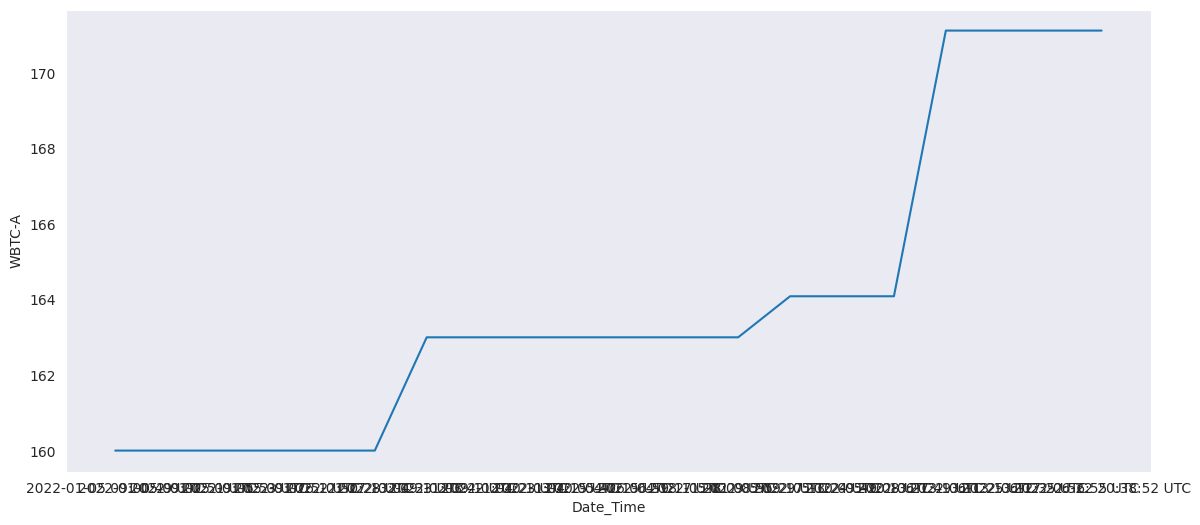

In [140]:
plt.figure(figsize = [14,6])
plt.grid()
plt.plot(table_test_test_wbtc['Date_Time'], table_test_test_wbtc['Sum_Cols'])
plt.xlabel("Date_Time")
plt.ylabel("WBTC-A")
#plt.title("Vault: 0x4032EE21404af045f6ba8022Cf4607950c87A39A")
plt.show

## ETH-A

In [141]:
ETH_A = dff_new[dff_new['Ilks'] == '"ETH-A"']
ETH_A = ETH_A.reset_index()
ETH_A.drop(labels = ['index'],axis=1,inplace=True) 
ETH_A

Ilks                                      Vaults fn_name  \
0      "ETH-A"  0x356500c890D65c7185672BCe5Aa77CB193F4A9a7    frob   
1      "ETH-A"  0xf3e72a998Cf621A4C4b7D9B6D2a47194EA3c54c6    ilks   
2      "ETH-A"  0xf3e72a998Cf621A4C4b7D9B6D2a47194EA3c54c6    fold   
3      "ETH-A"  0xf3e72a998Cf621A4C4b7D9B6D2a47194EA3c54c6    frob   
4      "ETH-A"  0xf3e72a998Cf621A4C4b7D9B6D2a47194EA3c54c6    move   
...        ...                                         ...     ...   
64038  "ETH-A"  0xd42ec2aBE14483ed6bCbEdbbB5635D95a1CccD97    flux   
64039  "ETH-A"  0xd42ec2aBE14483ed6bCbEdbbB5635D95a1CccD97    move   
64040  "ETH-A"  0xb3c550273A0b0CC6Ee8eC31CEB5C2447f491A4a8    move   
64041  "ETH-A"  0xb3c550273A0b0CC6Ee8eC31CEB5C2447f491A4a8    frob   
64042  "ETH-A"  0xE456f3586604247e14841c507C930BAcc51C481c    frob   

                                                    args  \
0      {'i': b'ETH-A\x00\x00\x00\x00\x00\x00\x00\x00\...   
1      {'': b'ETH-A\x00\x00\x00\x00\x00\x00\x00\x00\x...   
2      {'i': b'ETH-A\x00\x00\x00\x00\x00\x00\x00\x00\...   
3      {'i': b'ETH-A\x00\x00\x00\x00\x00\x00\x00\x00\...   
4      {'src': '0xf3e72a998Cf621A4C4b7D9B6D2a47194EA3...   
...                                                  ...   
64038  {'ilk': b'ETH-A\x00\x00\x00\x00\x00\x00\x00\x0...   
64039  {'src': '0x9759A6Ac90977b93B58547b4A71c78317f3...   
64040  {'src': '0x9759A6Ac90977b93B58547b4A71c78317f3...   
64041  {'i': b'ETH-A\x00\x00\x00\x00\x00\x00\x00\x00\...   
64042  {'i': b'ETH-A\x00\x00\x00\x00\x00\x00\x00\x00\...   

                     timestamp  block_number  transaction_index trace_address  \
0      2022-01-01 00:25:53 UTC      13916302                211       0,5,0,8   
1      2022-01-01 00:25:56 UTC      13916303                256         0,3,0   
2      2022-01-01 00:25:56 UTC      13916303                256         0,3,1   
3      2022-01-01 00:25:56 UTC      13916303                256         0,5,0   
4      2022-01-01 00:25:56 UTC      13916303                256         0,6,0   
...                        ...           ...                ...           ...   
64038  2022-06-22 20:55:16 UTC      15009522                 65    0,2,2,12,0   
64039  2022-06-22 20:55:16 UTC      15009522                 65       0,2,4,0   
64040  2022-06-22 22:10:34 UTC      15009793                215         0,8,0   
64041  2022-06-22 22:10:34 UTC      15009793                215        0,12,0   
64042  2022-06-22 22:17:00 UTC      15009821                676         0,0,0   

                                        transaction_hash  usr  ...  \
0      0x04b35b97b43fee36e8918eb4b04c923aff3885c47c61...  NaN  ...   
1      0xa2e091c632ff52bc99deff84233880ddb79fdc579842...  NaN  ...   
2      0xa2e091c632ff52bc99deff84233880ddb79fdc579842...  NaN  ...   
3      0xa2e091c632ff52bc99deff84233880ddb79fdc579842...  NaN  ...   
4      0xa2e091c632ff52bc99deff84233880ddb79fdc579842...  NaN  ...   
...                                                  ...  ...  ...   
64038  0xce6f4957815ac3ebaf75a5dffee97b229956d0201153...  NaN  ...   
64039  0xce6f4957815ac3ebaf75a5dffee97b229956d0201153...  NaN  ...   
64040  0xff9d6fafb647c07097d24ddf6e677d611f2554ffd819...  NaN  ...   
64041  0xff9d6fafb647c07097d24ddf6e677d611f2554ffd819...  NaN  ...   
64042  0xb1dd583d7352e064e78c811d6bac83682bf1969eb7eb...  NaN  ...   

                                                u  \
0      0x356500c890D65c7185672BCe5Aa77CB193F4A9a7   
1                                             NaN   
2      0xA950524441892A31ebddF91d3cEEFa04Bf454466   
3      0xf3e72a998Cf621A4C4b7D9B6D2a47194EA3c54c6   
4                                             NaN   
...                                           ...   
64038                                         NaN   
64039                                         NaN   
64040                                         NaN   
64041  0xb3c550273A0b0CC6Ee8eC31CEB5C2447f491A4a8   
64042  0xE456f3586604247e14841c507C930BAcc51C481c  

In [142]:
ETH_A['fn_name'].unique()

array(['frob', 'ilks', 'fold', 'move', 'flux', 'grab'], dtype=object)

In [143]:
len(ETH_A['Vaults'].unique())

2356

In [144]:
ETH_A[ETH_A['Vaults'] == '0x4032EE21404af045f6ba8022Cf4607950c87A39A' ]

Ilks                                      Vaults fn_name  \
34265  "ETH-A"  0x4032EE21404af045f6ba8022Cf4607950c87A39A    frob   
34266  "ETH-A"  0x4032EE21404af045f6ba8022Cf4607950c87A39A    ilks   
34267  "ETH-A"  0x4032EE21404af045f6ba8022Cf4607950c87A39A    fold   
34268  "ETH-A"  0x4032EE21404af045f6ba8022Cf4607950c87A39A    frob   
34269  "ETH-A"  0x4032EE21404af045f6ba8022Cf4607950c87A39A    move   
34270  "ETH-A"  0x4032EE21404af045f6ba8022Cf4607950c87A39A    move   
36776  "ETH-A"  0x4032EE21404af045f6ba8022Cf4607950c87A39A    frob   
36777  "ETH-A"  0x4032EE21404af045f6ba8022Cf4607950c87A39A    frob   
36778  "ETH-A"  0x4032EE21404af045f6ba8022Cf4607950c87A39A    flux   
37722  "ETH-A"  0x4032EE21404af045f6ba8022Cf4607950c87A39A    frob   
40508  "ETH-A"  0x4032EE21404af045f6ba8022Cf4607950c87A39A    move   
40509  "ETH-A"  0x4032EE21404af045f6ba8022Cf4607950c87A39A    frob   
40510  "ETH-A"  0x4032EE21404af045f6ba8022Cf4607950c87A39A    frob   
40511  "ETH-A"  0x4032EE21404af045f6ba8022Cf4607950c87A39A    flux   
40512  "ETH-A"  0x4032EE21404af045f6ba8022Cf4607950c87A39A    frob   
40513  "ETH-A"  0x4032EE21404af045f6ba8022Cf4607950c87A39A    flux   

                                                    args  \
34265  {'i': b'ETH-A\x00\x00\x00\x00\x00\x00\x00\x00\...   
34266  {'': b'ETH-A\x00\x00\x00\x00\x00\x00\x00\x00\x...   
34267  {'i': b'ETH-A\x00\x00\x00\x00\x00\x00\x00\x00\...   
34268  {'i': b'ETH-A\x00\x00\x00\x00\x00\x00\x00\x00\...   
34269  {'src': '0x4032EE21404af045f6ba8022Cf4607950c8...   
34270  {'src': '0x8f4cEF8C3335525d85f3Ba5299842010Fc9...   
36776  {'i': b'ETH-A\x00\x00\x00\x00\x00\x00\x00\x00\...   
36777  {'i': b'ETH-A\x00\x00\x00\x00\x00\x00\x00\x00\...   
36778  {'ilk': b'ETH-A\x00\x00\x00\x00\x00\x00\x00\x0...   
37722  {'i': b'ETH-A\x00\x00\x00\x00\x00\x00\x00\x00\...   
40508  {'src': '0x9759A6Ac90977b93B58547b4A71c78317f3...   
40509  {'i': b'ETH-A\x00\x00\x00\x00\x00\x00\x00\x00\...   
40510  {'i': b'ETH-A\x00\x00\x00\x00\x00\x00\x00\x00\...   
40511  {'ilk': b'ETH-A\x00\x00\x00\x00\x00\x00\x00\x0...   
40512  {'i': b'ETH-A\x00\x00\x00\x00\x00\x00\x00\x00\...   
40513  {'ilk': b'ETH-A\x00\x00\x00\x00\x00\x00\x00\x0...   

                     timestamp  block_number  transaction_index  \
34265  2022-03-24 16:46:36 UTC      14450142                282   
34266  2022-03-24 16:46:36 UTC      14450142                282   
34267  2022-03-24 16:46:36 UTC      14450142                282   
34268  2022-03-24 16:46:36 UTC      14450142                282   
34269  2022-03-24 16:46:36 UTC      14450142                282   
34270  2022-03-24 16:46:36 UTC      14450142                282   
36776  2022-04-02 20:17:15 UTC      14508816                167   
36777  2022-04-02 20:19:24 UTC      14508826                228   
36778  2022-04-02 20:19:24 UTC      14508826                228   
37722  2022-04-06 18:25:55 UTC      14533883                196   
40508  2022-04-25 05:40:34 UTC      14652009                138   
40509  2022-04-25 05:40:34 UTC      14652009                138   
40510  2022-04-25 05:40:34 UTC      14652009                138   
40511  2022-04-25 05:40:34 UTC      14652009                138   
40512  2022-04-25 05:42:39 UTC      14652019                253   
40513  2022-04-25 05:42:39 UTC      14652019                253   

              trace_address  \
34265               0,7,0,8   
34266             0,9,0,2,0   
34267             0,9,0,2,1   
34268             0,9,0,4,0   
34269             0,9,0,5,0   
34270             0,9,0,7,0   
36776               0,5,0,8   
36777             0,3,0,1,0   
36778             0,3,0,2,0   
37722               0,5,0,8   
40508   0,4,0,3,2,1,3,0,6,0   
40509  0,4,0,3,2,1,3,0,10,0   
40510   0,4,0,3,2,1,5,0,1,0   
40511   0,4,0,3,2,1,5,0,2,0   
40512             0,3,0,1,0   
40513             0,3,0,2,0   

                                        transaction_hash  usr  ...  \
34265  0xa5b04a826d0c72f3326a5646227d2e7c19f8670b878a...  Na

### Transform Table

In [145]:
unique_val = list(ETH_A['Vaults'].unique())

In [146]:
len(unique_val)

2356

In [147]:
#0x4032EE21404af045f6ba8022Cf4607950c87A39A  Normal Case
#0x4f4d84064cfD8F84316C0c28030883C57e453767  Liquidate
unique_val[62]

'0x4f4d84064cfD8F84316C0c28030883C57e453767'

In [148]:
#ETH_A_Vaults = list(ETH_A['Vaults'].unique())
ETH_A_Vaults = ['0x4032EE21404af045f6ba8022Cf4607950c87A39A']

liquid = []
for i in ETH_A_Vaults:
  table_ethA = ETH_A[ETH_A['Vaults'] == i]

  dinks, darts, dprins, opers = [], [], [], []
  dates, txns, vvs, names = [], [], [], []

  cols = ['Date_Time', 'Tx_Hash', 'Vault', 'Function', 'Operation', 'D_Collateral', 'D_Principal', 'D_ART' ]

  for index, row in table_ethA.iterrows(): #tdqm(, total=table_ethA.shape[0])
    tx_hash = row['transaction_hash']
    vv = row['Vaults']
    date = row['timestamp']
    name = row['fn_name']

    #------------------------Check frob------------------------------
    if row['fn_name'] == 'frob' :
      rad = 0
      dprins.append(rad)

      if row['dink'] > 0:
        oper = 'deposit'
        opers.append(oper)

        dink = row['dink'] / 1e18
        dinks.append(dink)

        dart = row['dart'] 
        darts.append(dart)

        txns.append(tx_hash)
        vvs.append(vv)
        dates.append(date)
        names.append(name)
      

      if row['dink'] < 0:
        oper = 'withdraw'
        opers.append(oper)

        dink = row['dink'] / 1e18
        dinks.append(dink)

        dart = row['dart'] 
        darts.append(dart)

        txns.append(tx_hash)
        vvs.append(vv)
        dates.append(date)
        names.append(name)

      if (row['dink'] == 0) and (row['dart'] > 0):
        oper = 'deposit'
        opers.append(oper)

        dink = row['dink'] / 1e18
        dinks.append(dink)

        dart = row['dart']
        darts.append(dart)

        txns.append(tx_hash)
        vvs.append(vv)
        dates.append(date)
        names.append(name)

      if (row['dink'] == 0) and (row['dart'] < 0):
        oper = 'payback'
        opers.append(oper)

        dink = row['dink'] / 1e18
        dinks.append(dink)

        dart = row['dart']
        darts.append(dart)

        txns.append(tx_hash)
        vvs.append(vv)
        dates.append(date)
        names.append(name)

    #------------------------Check move------------------------------
    if row['fn_name'] == 'move':
      if row['src'] == row['Vaults']:
        oper = 'generate'
        opers.append(oper)

        rad = row['rad'] /1e45
        dprins.append(rad)

        dink = 0
        dinks.append(dink)

        dart = 0
        darts.append(dart)

        txns.append(tx_hash)
        vvs.append(vv)
        dates.append(date)
        names.append(name)

      if row['dst'] == row['Vaults']:
        oper = 'payback'
        opers.append(oper)

        rad = row['rad'] / 1e45
        dprins.append(rad)

        dink = 0
        dinks.append(dink)

        dart = 0
        darts.append(dart)

        txns.append(tx_hash)
        vvs.append(vv)
        dates.append(date)
        names.append(name)

    #------------------------Check Grab------------------------------
    if row['fn_name'] == 'grab':
      oper = 'liquidate'
      opers.append(oper)

      dink = row['dink'] /1e18
      dinks.append(dink)

      dart = row['dart']
      darts.append(dart)

      rad = 0
      dprins.append(rad)

      txns.append(tx_hash)
      vvs.append(vv)
      dates.append(date)
      names.append(name)

  if 'liquidate' in opers:
    liq = 1
    liquid.append(liq)
  if 'liquidate' not in opers:
    no_liq = 0
    liquid.append(no_liq)

#print(liquid)


In [149]:
save_liq = liquid

In [150]:
save_liq = np.array(save_liq).reshape(len(save_liq),1)
table_liquidate = pd.DataFrame(data=save_liq, columns= ['labels'])

In [151]:
table_liquidate[table_liquidate['labels'] == 1]

Empty DataFrame
Columns: [labels]
Index: []

In [152]:
print(len(dates))
print(len(opers))
print(len(dinks))
print(len(darts))
print(len(txns))
print(len(vvs))
print(len(names))
print(len(dprins))

10
10
10
10
10
10
10
10


In [153]:
dinks = np.array(dinks).reshape(len(dinks),1)
darts = np.array(darts).reshape(len(darts),1)
dprins = np.array(dprins).reshape(len(dprins),1)
opers = np.array(opers).reshape(len(opers),1)
dates = np.array(dates).reshape(len(dates),1)
txns = np.array(txns).reshape(len(txns),1)
vvs = np.array(vvs).reshape(len(vvs),1)
names = np.array(names).reshape(len(names),1)

In [154]:
cols = ['Date_Time', 'Tx_Hash', 'Vault', 'Function', 'Operation', 'D_Collateral', 'D_Principal', 'D_ART' ]

In [155]:
one = pd.DataFrame(data=dates, columns= ['Date_Time'])
two = pd.DataFrame(data=txns, columns= ['Tx_Hash'])
three = pd.DataFrame(data=vvs, columns= ['Vault'])
four = pd.DataFrame(data=names, columns= ['Function'])
five = pd.DataFrame(data=opers, columns= ['Operation'])
six = pd.DataFrame(data=dinks, columns= ['D_Collateral'])
seven = pd.DataFrame(data=dprins, columns= ['D_Principal'])
eight = pd.DataFrame(data=darts, columns= ['D_ART'])

In [156]:
one.reset_index(drop=True, inplace=True)
two.reset_index(drop=True, inplace=True)
three.reset_index(drop=True, inplace=True)
four.reset_index(drop=True, inplace=True)
five.reset_index(drop=True, inplace=True)
six.reset_index(drop=True, inplace=True)
seven.reset_index(drop=True, inplace=True)
eight.reset_index(drop=True, inplace=True)

table_test = pd.concat( [one, two, three, four, five, six, seven, eight], axis=1) 


table_test2 = pd.concat( [one, five, six, seven, eight], axis=1) 
table_test2

Date_Time Operation  D_Collateral    D_Principal  \
0  2022-03-24 16:46:36 UTC   deposit     90.000000       0.000000   
1  2022-03-24 16:46:36 UTC   deposit      0.000000       0.000000   
2  2022-03-24 16:46:36 UTC  generate      0.000000  120000.000000   
3  2022-04-02 20:17:15 UTC   deposit     35.000000       0.000000   
4  2022-04-02 20:19:24 UTC  withdraw    -55.000000       0.000000   
5  2022-04-06 18:25:55 UTC   deposit     30.000000       0.000000   
6  2022-04-25 05:40:34 UTC   payback      0.000000  120230.781376   
7  2022-04-25 05:40:34 UTC   payback      0.000000       0.000000   
8  2022-04-25 05:40:34 UTC  withdraw    -42.998377       0.000000   
9  2022-04-25 05:42:39 UTC  withdraw    -57.001623       0.000000   

          D_ART  
0  0.000000e+00  
1  1.124686e+23  
2  0.000000e+00  
3  0.000000e+00  
4  0.000000e+00  
5  0.000000e+00  
6  0.000000e+00  
7 -1.124686e+23  
8  0.000000e+00  
9  0.000000e+00

In [157]:
val = 0
vals = []
for index, row in tqdm(table_test2.iterrows(), total=table_test2.shape[0]):
  val = val + row['D_Collateral']
  vals.append(val)

print(vals)


100%|██████████| 10/10 [00:00<00:00, 8619.61it/s]

[90.0, 90.0, 90.0, 125.0, 70.0, 100.0, 100.0, 100.0, 57.00162258455088, 0.0]


In [158]:
vals

[90.0, 90.0, 90.0, 125.0, 70.0, 100.0, 100.0, 100.0, 57.00162258455088, 0.0]

In [159]:
vals = np.array(vals).reshape(len(vals),1)
vvv = pd.DataFrame(data=vals, columns= ['Sum_Cols'])
vvv.reset_index(drop=True, inplace=True)

table_test_test_eth = pd.concat( [table_test2, vvv], axis=1)
table_test_test_eth


Date_Time Operation  D_Collateral    D_Principal  \
0  2022-03-24 16:46:36 UTC   deposit     90.000000       0.000000   
1  2022-03-24 16:46:36 UTC   deposit      0.000000       0.000000   
2  2022-03-24 16:46:36 UTC  generate      0.000000  120000.000000   
3  2022-04-02 20:17:15 UTC   deposit     35.000000       0.000000   
4  2022-04-02 20:19:24 UTC  withdraw    -55.000000       0.000000   
5  2022-04-06 18:25:55 UTC   deposit     30.000000       0.000000   
6  2022-04-25 05:40:34 UTC   payback      0.000000  120230.781376   
7  2022-04-25 05:40:34 UTC   payback      0.000000       0.000000   
8  2022-04-25 05:40:34 UTC  withdraw    -42.998377       0.000000   
9  2022-04-25 05:42:39 UTC  withdraw    -57.001623       0.000000   

          D_ART    Sum_Cols  
0  0.000000e+00   90.000000  
1  1.124686e+23   90.000000  
2  0.000000e+00   90.000000  
3  0.000000e+00  125.000000  
4  0.000000e+00   70.000000  
5  0.000000e+00  100.000000  
6  0.000000e+00  100.000000  
7 -1.124686e+23  100.000000  
8  0.000000e+00   57.001623  
9  0.000000e+00    0.000000

### Table 1 ETH-A

<function matplotlib.pyplot.show(close=None, block=None)>

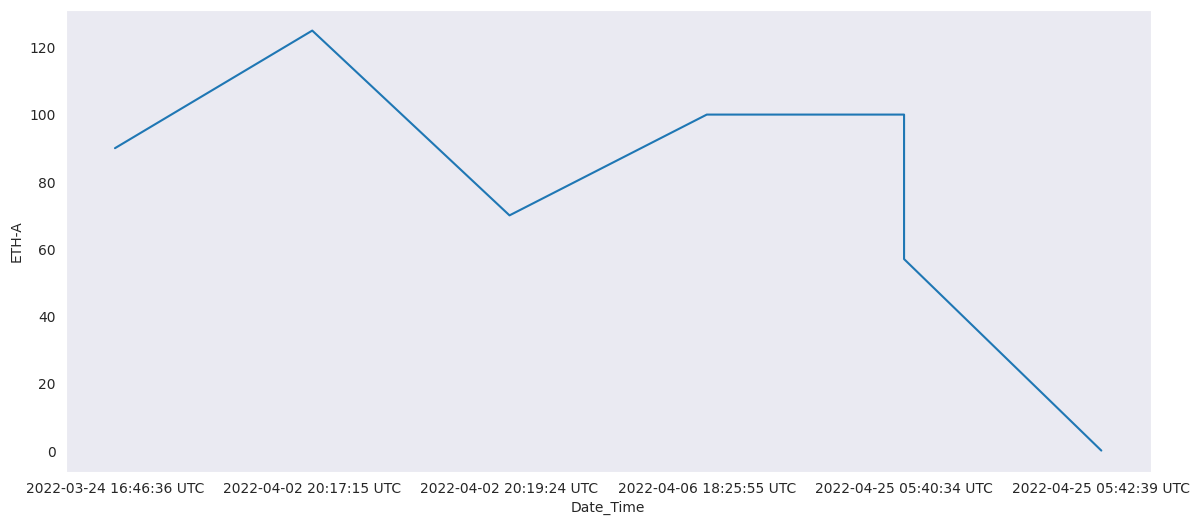

In [160]:
plt.figure(figsize = [14,6])
plt.grid()
plt.plot(table_test_test_eth['Date_Time'], table_test_test_eth['Sum_Cols'])
plt.xlabel("Date_Time")
plt.ylabel("ETH-A")
#plt.title("Vault: 0x4032EE21404af045f6ba8022Cf4607950c87A39A")
plt.show

### Correlation

In [161]:
def histogram_intersection(a, b):
     v = np.minimum(a, b).sum().round(decimals=1)
     return v

In [162]:
table_test_test_eth['Sum_Cols'].corr(table_test_test_wbtc['Sum_Cols'][:9], method=histogram_intersection)

822.0

In [163]:
table_test_test_eth['Sum_Cols'].cov(table_test_test_wbtc['Sum_Cols'][:9])

0.0

### Table_test3

In [97]:
one.reset_index(drop=True, inplace=True)
two.reset_index(drop=True, inplace=True)
three.reset_index(drop=True, inplace=True)
four.reset_index(drop=True, inplace=True)
five.reset_index(drop=True, inplace=True)
six.reset_index(drop=True, inplace=True)
seven.reset_index(drop=True, inplace=True)
eight.reset_index(drop=True, inplace=True)

#table_test = pd.concat( [one, two, three, four, five, six, seven, eight], axis=1) 


table_test2 = pd.concat( [one, five, six, seven, eight], axis=1) 
table_test2

Date_Time Operation  D_Collateral    D_Principal  \
0  2022-03-24 16:46:36 UTC   deposit     90.000000       0.000000   
1  2022-03-24 16:46:36 UTC   deposit      0.000000       0.000000   
2  2022-03-24 16:46:36 UTC  generate      0.000000  120000.000000   
3  2022-04-02 20:17:15 UTC   deposit     35.000000       0.000000   
4  2022-04-02 20:19:24 UTC  withdraw    -55.000000       0.000000   
5  2022-04-06 18:25:55 UTC   deposit     30.000000       0.000000   
6  2022-04-25 05:40:34 UTC   payback      0.000000  120230.781376   
7  2022-04-25 05:40:34 UTC   payback      0.000000       0.000000   
8  2022-04-25 05:40:34 UTC  withdraw    -42.998377       0.000000   
9  2022-04-25 05:42:39 UTC  withdraw    -57.001623       0.000000   

          D_ART  
0  0.000000e+00  
1  1.124686e+23  
2  0.000000e+00  
3  0.000000e+00  
4  0.000000e+00  
5  0.000000e+00  
6  0.000000e+00  
7 -1.124686e+23  
8  0.000000e+00  
9  0.000000e+00

In [98]:
val = 0
vals = []
for index, row in tqdm(table_test2.iterrows(), total=table_test2.shape[0]):
  val = val + row['D_Collateral']
  vals.append(val)

print(vals)

100%|██████████| 10/10 [00:00<00:00, 8381.90it/s]

[90.0, 90.0, 90.0, 125.0, 70.0, 100.0, 100.0, 100.0, 57.00162258455088, 0.0]


In [99]:
vals = np.array(vals).reshape(len(vals),1)
vvv = pd.DataFrame(data=vals, columns= ['Sum_Cols'])
vvv.reset_index(drop=True, inplace=True)

table_test_test = pd.concat( [table_test2, vvv], axis=1) 
table_test_test

Date_Time Operation  D_Collateral    D_Principal  \
0  2022-03-24 16:46:36 UTC   deposit     90.000000       0.000000   
1  2022-03-24 16:46:36 UTC   deposit      0.000000       0.000000   
2  2022-03-24 16:46:36 UTC  generate      0.000000  120000.000000   
3  2022-04-02 20:17:15 UTC   deposit     35.000000       0.000000   
4  2022-04-02 20:19:24 UTC  withdraw    -55.000000       0.000000   
5  2022-04-06 18:25:55 UTC   deposit     30.000000       0.000000   
6  2022-04-25 05:40:34 UTC   payback      0.000000  120230.781376   
7  2022-04-25 05:40:34 UTC   payback      0.000000       0.000000   
8  2022-04-25 05:40:34 UTC  withdraw    -42.998377       0.000000   
9  2022-04-25 05:42:39 UTC  withdraw    -57.001623       0.000000   

          D_ART    Sum_Cols  
0  0.000000e+00   90.000000  
1  1.124686e+23   90.000000  
2  0.000000e+00   90.000000  
3  0.000000e+00  125.000000  
4  0.000000e+00   70.000000  
5  0.000000e+00  100.000000  
6  0.000000e+00  100.000000  
7 -1.124686e+23  100.000000  
8  0.000000e+00   57.001623  
9  0.000000e+00    0.000000

<function matplotlib.pyplot.show(close=None, block=None)>

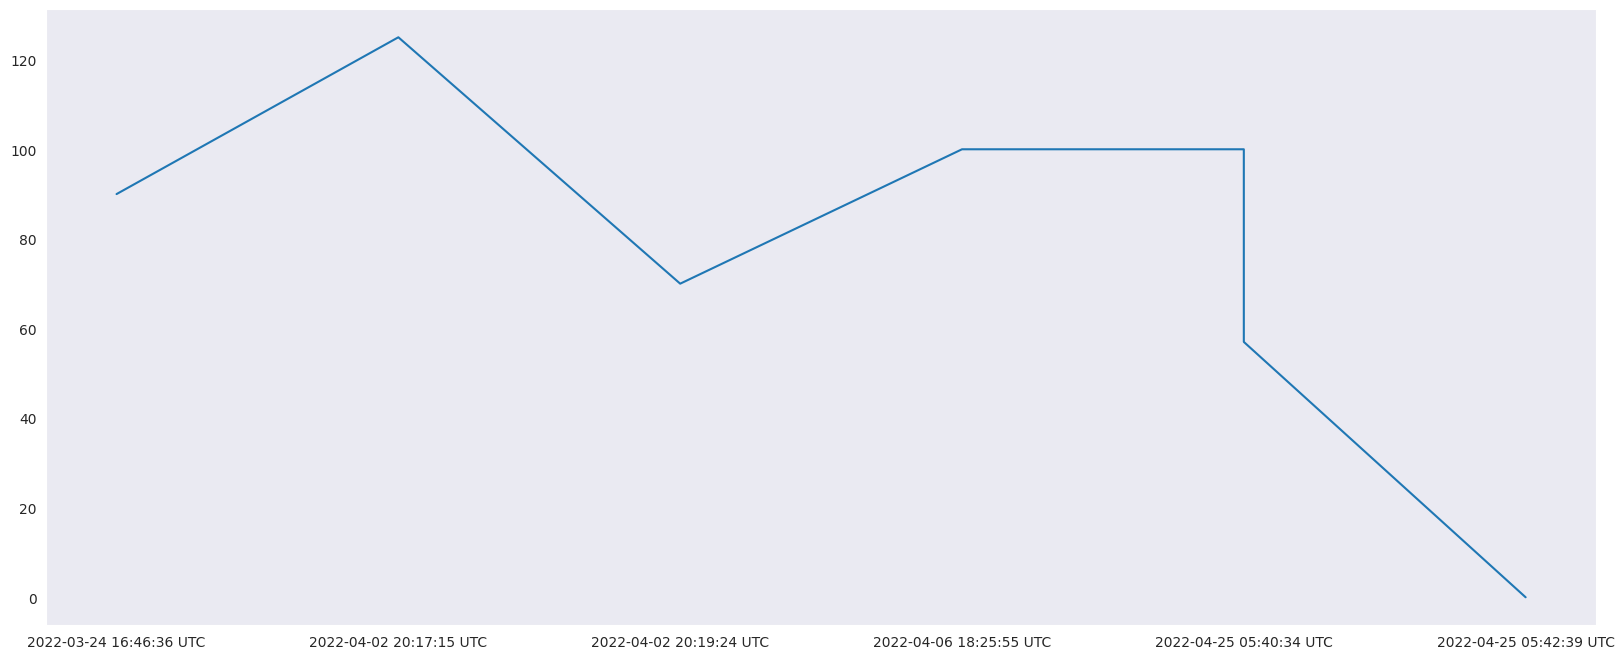

In [100]:
import matplotlib.pyplot as plt


plt.figure(figsize = [20,8])
plt.grid()
plt.plot(table_test_test['Date_Time'], table_test_test['Sum_Cols'])
plt.show

#Table_test4

In [230]:
one.reset_index(drop=True, inplace=True)
two.reset_index(drop=True, inplace=True)
three.reset_index(drop=True, inplace=True)
four.reset_index(drop=True, inplace=True)
five.reset_index(drop=True, inplace=True)
six.reset_index(drop=True, inplace=True)
seven.reset_index(drop=True, inplace=True)
eight.reset_index(drop=True, inplace=True)

table_test = pd.concat( [one, two, three, four, five, six, seven, eight], axis=1) 


table_test2 = pd.concat( [one, five, six, seven, eight], axis=1) 
table_test2

Date_Time Operation  D_Collateral    D_Principal  \
0  2022-03-24 16:46:36 UTC   deposit     90.000000       0.000000   
1  2022-03-24 16:46:36 UTC   deposit      0.000000       0.000000   
2  2022-03-24 16:46:36 UTC  generate      0.000000  120000.000000   
3  2022-04-02 20:17:15 UTC   deposit     35.000000       0.000000   
4  2022-04-02 20:19:24 UTC  withdraw    -55.000000       0.000000   
5  2022-04-06 18:25:55 UTC   deposit     30.000000       0.000000   
6  2022-04-25 05:40:34 UTC   payback      0.000000  120230.781376   
7  2022-04-25 05:40:34 UTC   payback      0.000000       0.000000   
8  2022-04-25 05:40:34 UTC  withdraw    -42.998377       0.000000   
9  2022-04-25 05:42:39 UTC  withdraw    -57.001623       0.000000   

          D_ART  
0  0.000000e+00  
1  1.124686e+23  
2  0.000000e+00  
3  0.000000e+00  
4  0.000000e+00  
5  0.000000e+00  
6  0.000000e+00  
7 -1.124686e+23  
8  0.000000e+00  
9  0.000000e+00

In [231]:
table_test2['Operation'].unique()

array(['deposit', 'generate', 'withdraw', 'payback'], dtype=object)

In [490]:
val = 0
vals = []
for index, row in tqdm(table_test2.iterrows(), total=table_test2.shape[0]):
  val = val + row['D_Collateral']
  vals.append(val)

100%|██████████| 10/10 [00:00<00:00, 8811.56it/s]


In [500]:
vals = np.array(vals).reshape(len(vals),1)
vvv = pd.DataFrame(data=vals, columns= ['Sum_Cols'])
vvv.reset_index(drop=True, inplace=True)

table_test_test = pd.concat( [table_test2, vvv], axis=1)
table_test_test['Date_Time'] = pd.to_datetime(table_test_test['Date_Time']).dt.date
table_test_test

Date_Time Operation  D_Collateral    D_Principal         D_ART    Sum_Cols
0  2022-03-24   deposit     90.000000       0.000000  0.000000e+00   90.000000
1  2022-03-24   deposit      0.000000       0.000000  1.124686e+23   90.000000
2  2022-03-24  generate      0.000000  120000.000000  0.000000e+00   90.000000
3  2022-04-02   deposit     35.000000       0.000000  0.000000e+00  125.000000
4  2022-04-02  withdraw    -55.000000       0.000000  0.000000e+00   70.000000
5  2022-04-06   deposit     30.000000       0.000000  0.000000e+00  100.000000
6  2022-04-25   payback      0.000000  120230.781376  0.000000e+00  100.000000
7  2022-04-25   payback      0.000000       0.000000 -1.124686e+23  100.000000
8  2022-04-25  withdraw    -42.998377       0.000000  0.000000e+00   57.001623
9  2022-04-25  withdraw    -57.001623       0.000000  0.000000e+00    0.000000

In [501]:
table_test_test['D_Principal'] = np.where(table_test_test['Operation'] == 'payback', table_test_test['D_Principal'] * -1, table_test_test['D_Principal'])
table_test_test

Date_Time Operation  D_Collateral    D_Principal         D_ART    Sum_Cols
0  2022-03-24   deposit     90.000000       0.000000  0.000000e+00   90.000000
1  2022-03-24   deposit      0.000000       0.000000  1.124686e+23   90.000000
2  2022-03-24  generate      0.000000  120000.000000  0.000000e+00   90.000000
3  2022-04-02   deposit     35.000000       0.000000  0.000000e+00  125.000000
4  2022-04-02  withdraw    -55.000000       0.000000  0.000000e+00   70.000000
5  2022-04-06   deposit     30.000000       0.000000  0.000000e+00  100.000000
6  2022-04-25   payback      0.000000 -120230.781376  0.000000e+00  100.000000
7  2022-04-25   payback      0.000000      -0.000000 -1.124686e+23  100.000000
8  2022-04-25  withdraw    -42.998377       0.000000  0.000000e+00   57.001623
9  2022-04-25  withdraw    -57.001623       0.000000  0.000000e+00    0.000000

In [502]:
user_account = pd.DataFrame(columns=['Date_Time','D_Collateral', 'D_Principal', 'D_ART', 'Sum_Cols'])
dates = pd.DataFrame({"Date_Time":pd.date_range(table_test_test['Date_Time'].iloc[0], table_test_test['Date_Time'].iloc[-1])}).astype(object)
dates['Date_Time'] = pd.to_datetime(dates['Date_Time']).dt.date
user_account = dates.merge(user_account, how='left', left_on='Date_Time', right_on='Date_Time')
user_account

Date_Time D_Collateral D_Principal D_ART Sum_Cols
0   2022-03-24          NaN         NaN   NaN      NaN
1   2022-03-25          NaN         NaN   NaN      NaN
2   2022-03-26          NaN         NaN   NaN      NaN
3   2022-03-27          NaN         NaN   NaN      NaN
4   2022-03-28          NaN         NaN   NaN      NaN
5   2022-03-29          NaN         NaN   NaN      NaN
6   2022-03-30          NaN         NaN   NaN      NaN
7   2022-03-31          NaN         NaN   NaN      NaN
8   2022-04-01          NaN         NaN   NaN      NaN
9   2022-04-02          NaN         NaN   NaN      NaN
10  2022-04-03          NaN         NaN   NaN      NaN
11  2022-04-04          NaN         NaN   NaN      NaN
12  2022-04-05          NaN         NaN   NaN      NaN
13  2022-04-06          NaN         NaN   NaN      NaN
14  2022-04-07          NaN         NaN   NaN      NaN
15  2022-04-08          NaN         NaN   NaN      NaN
16  2022-04-09          NaN         NaN   NaN      NaN
17  2022-04-10          NaN         NaN   NaN      NaN
18  2022-04-11          NaN         NaN   NaN      NaN
19  2022-04-12          NaN         NaN   NaN      NaN
20  2022-04-13          NaN         NaN   NaN      NaN
21  2022-04-14          NaN         NaN   NaN      NaN
22  2022-04-15          NaN         NaN   NaN      NaN
23  2022-04-16          NaN         NaN   NaN      NaN
24  2022-04-17          NaN         NaN   NaN      NaN
25  2022-04-18          NaN         NaN   NaN      NaN
26  2022-04-19          NaN         NaN   NaN      NaN
27  2022-04-20          NaN         NaN   NaN      NaN
28  2022-04-21          NaN         NaN   NaN      NaN
29  2022-04-22          NaN         NaN   NaN      NaN
30  2022-04-23          NaN         NaN   NaN      NaN
31  2022-04-24          NaN         NaN   NaN      NaN
32  2022-04-25          NaN         NaN   NaN      NaN

### Add exchange rate for each day

 https://www.marketwatch.com/investing/cryptocurrency/ethusd/download-data?startDate=3/1/2022&endDate=4/29/2022
 assume for now that DAI is 1:1 to $

In [503]:
Data_eth = pd.read_csv('/mnt/SSD/mikhail.evdokimov/mikhailev/miniconda3/michaelpyenv/bin/michael.evdokimov/Coursework/Data_eth')
Data_eth = Data_eth.drop(columns=['Open', 'High', 'Low'])
Data_eth['Date'] = pd.to_datetime(Data_eth['Date']).dt.date
Data_eth = Data_eth.rename(columns={'Close' : "ETH_price"})
Data_eth['ETH_price'] = Data_eth['ETH_price'].astype(str).str.replace(',','').astype(float)
Data_eth = Data_eth.sort_values(by='Date')
Data_eth

Date  ETH_price
59  2022-03-01    2954.79
58  2022-03-02    2963.89
57  2022-03-03    2804.50
56  2022-03-04    2608.32
55  2022-03-05    2655.49
54  2022-03-06    2627.79
53  2022-03-07    2484.17
52  2022-03-08    2560.80
51  2022-03-09    2708.44
50  2022-03-10    2604.00
49  2022-03-11    2573.60
48  2022-03-12    2586.98
47  2022-03-13    2547.01
46  2022-03-14    2524.55
45  2022-03-15    2625.59
44  2022-03-16    2774.50
43  2022-03-17    2807.99
42  2022-03-18    2952.01
41  2022-03-19    2956.80
40  2022-03-20    2877.47
39  2022-03-21    2911.51
38  2022-03-22    3001.61
37  2022-03-23    2981.96
36  2022-03-24    3104.85
35  2022-03-25    3128.32
34  2022-03-26    3144.00
33  2022-03-27    3238.88
32  2022-03-28    3417.28
31  2022-03-29    3395.20
30  2022-03-30    3413.71
29  2022-03-31    3299.98
28  2022-04-01    3443.19
27  2022-04-02    3471.20
26  2022-04-03    3495.00
25  2022-04-04    3510.17
24  2022-04-05    3436.17
23  2022-04-06    3235.47
22  2022-04-07    3238.51
21  2022-04-08    3247.98
20  2022-04-09    3226.04
19  2022-04-10    3290.16
18  2022-04-11    2992.28
17  2022-04-12    2987.70
16  2022-04-13    3105.73
15  2022-04-14    3011.47
14  2022-04-15    3030.16
13  2022-04-16    3034.06
12  2022-04-17    3045.70
11  2022-04-18    3005.18
10  2022-04-19    3094.31
9   2022-04-20    3085.00
8   2022-04-21    3001.41
7   2022-04-22    2971.28
6   2022-04-23    2961.98
5   2022-04-24    2941.25
4   2022-04-25    2996.74
3   2022-04-26    2828.63
2   2022-04-27    2864.84
1   2022-04-28    2948.97
0   2022-04-29    2806.13

In [504]:
mask = (Data_eth['Date'] >= user_account['Date_Time'].iloc[0]) & (Data_eth['Date'] <= user_account['Date_Time'].iloc[-1])
Data_eth = Data_eth.loc[mask]
Data_eth = Data_eth.reset_index(drop=True)
Data_eth

Date  ETH_price
0   2022-03-24    3104.85
1   2022-03-25    3128.32
2   2022-03-26    3144.00
3   2022-03-27    3238.88
4   2022-03-28    3417.28
5   2022-03-29    3395.20
6   2022-03-30    3413.71
7   2022-03-31    3299.98
8   2022-04-01    3443.19
9   2022-04-02    3471.20
10  2022-04-03    3495.00
11  2022-04-04    3510.17
12  2022-04-05    3436.17
13  2022-04-06    3235.47
14  2022-04-07    3238.51
15  2022-04-08    3247.98
16  2022-04-09    3226.04
17  2022-04-10    3290.16
18  2022-04-11    2992.28
19  2022-04-12    2987.70
20  2022-04-13    3105.73
21  2022-04-14    3011.47
22  2022-04-15    3030.16
23  2022-04-16    3034.06
24  2022-04-17    3045.70
25  2022-04-18    3005.18
26  2022-04-19    3094.31
27  2022-04-20    3085.00
28  2022-04-21    3001.41
29  2022-04-22    2971.28
30  2022-04-23    2961.98
31  2022-04-24    2941.25
32  2022-04-25    2996.74

In [505]:
user_account["ETH_price"] = Data_eth["ETH_price"]
user_account

Date_Time D_Collateral D_Principal D_ART Sum_Cols  ETH_price
0   2022-03-24          NaN         NaN   NaN      NaN    3104.85
1   2022-03-25          NaN         NaN   NaN      NaN    3128.32
2   2022-03-26          NaN         NaN   NaN      NaN    3144.00
3   2022-03-27          NaN         NaN   NaN      NaN    3238.88
4   2022-03-28          NaN         NaN   NaN      NaN    3417.28
5   2022-03-29          NaN         NaN   NaN      NaN    3395.20
6   2022-03-30          NaN         NaN   NaN      NaN    3413.71
7   2022-03-31          NaN         NaN   NaN      NaN    3299.98
8   2022-04-01          NaN         NaN   NaN      NaN    3443.19
9   2022-04-02          NaN         NaN   NaN      NaN    3471.20
10  2022-04-03          NaN         NaN   NaN      NaN    3495.00
11  2022-04-04          NaN         NaN   NaN      NaN    3510.17
12  2022-04-05          NaN         NaN   NaN      NaN    3436.17
13  2022-04-06          NaN         NaN   NaN      NaN    3235.47
14  2022-04-07          NaN         NaN   NaN      NaN    3238.51
15  2022-04-08          NaN         NaN   NaN      NaN    3247.98
16  2022-04-09          NaN         NaN   NaN      NaN    3226.04
17  2022-04-10          NaN         NaN   NaN      NaN    3290.16
18  2022-04-11          NaN         NaN   NaN      NaN    2992.28
19  2022-04-12          NaN         NaN   NaN      NaN    2987.70
20  2022-04-13          NaN         NaN   NaN      NaN    3105.73
21  2022-04-14          NaN         NaN   NaN      NaN    3011.47
22  2022-04-15          NaN         NaN   NaN      NaN    3030.16
23  2022-04-16          NaN         NaN   NaN      NaN    3034.06
24  2022-04-17          NaN         NaN   NaN      NaN    3045.70
25  2022-04-18          NaN         NaN   NaN      NaN    3005.18
26  2022-04-19          NaN         NaN   NaN      NaN    3094.31
27  2022-04-20          NaN         NaN   NaN      NaN    3085.00
28  2022-04-21          NaN         NaN   NaN      NaN    3001.41
29  2022-04-22          NaN         NaN   NaN      NaN    2971.28
30  2022-04-23          NaN         NaN   NaN      NaN    2961.98
31  2022-04-24          NaN         NaN   NaN      NaN    2941.25
32  2022-04-25          NaN         NaN   NaN      NaN    2996.74

### Making user account table
TODO:
Fix table, some transactions on the same date possible

In [506]:
# dumb fill

for i, row in table_test_test.iterrows():

  cur_date = row['Date_Time']

  if row['D_Collateral'] != 0:
    user_account.loc[user_account["Date_Time"] == cur_date, "D_Collateral"] = row['D_Collateral']
  if row['D_Principal'] != 0:
    user_account.loc[user_account["Date_Time"] == cur_date, "D_Principal"] = row['D_Principal']
  if row['D_ART'] != 0:
    user_account.loc[user_account["Date_Time"] == cur_date, "D_ART"] = row['D_ART']
  if row['Sum_Cols'] != 0:
    user_account.loc[user_account["Date_Time"] == cur_date, "Sum_Cols"] = row['Sum_Cols']
user_account = user_account.fillna(0)
user_account

Date_Time  D_Collateral    D_Principal         D_ART    Sum_Cols  \
0   2022-03-24     90.000000  120000.000000  1.124686e+23   90.000000   
1   2022-03-25      0.000000       0.000000  0.000000e+00    0.000000   
2   2022-03-26      0.000000       0.000000  0.000000e+00    0.000000   
3   2022-03-27      0.000000       0.000000  0.000000e+00    0.000000   
4   2022-03-28      0.000000       0.000000  0.000000e+00    0.000000   
5   2022-03-29      0.000000       0.000000  0.000000e+00    0.000000   
6   2022-03-30      0.000000       0.000000  0.000000e+00    0.000000   
7   2022-03-31      0.000000       0.000000  0.000000e+00    0.000000   
8   2022-04-01      0.000000       0.000000  0.000000e+00    0.000000   
9   2022-04-02    -55.000000       0.000000  0.000000e+00   70.000000   
10  2022-04-03      0.000000       0.000000  0.000000e+00    0.000000   
11  2022-04-04      0.000000       0.000000  0.000000e+00    0.000000   
12  2022-04-05      0.000000       0.000000  0.000000e+00    0.000000   
13  2022-04-06     30.000000       0.000000  0.000000e+00  100.000000   
14  2022-04-07      0.000000       0.000000  0.000000e+00    0.000000   
15  2022-04-08      0.000000       0.000000  0.000000e+00    0.000000   
16  2022-04-09      0.000000       0.000000  0.000000e+00    0.000000   
17  2022-04-10      0.000000       0.000000  0.000000e+00    0.000000   
18  2022-04-11      0.000000       0.000000  0.000000e+00    0.000000   
19  2022-04-12      0.000000       0.000000  0.000000e+00    0.000000   
20  2022-04-13      0.000000       0.000000  0.000000e+00    0.000000   
21  2022-04-14      0.000000       0.000000  0.000000e+00    0.000000   
22  2022-04-15      0.000000       0.000000  0.000000e+00    0.000000   
23  2022-04-16      0.000000       0.000000  0.000000e+00    0.000000   
24  2022-04-17      0.000000       0.000000  0.000000e+00    0.000000   
25  2022-04-18      0.000000       0.000000  0.000000e+00    0.000000   
26  2022-04-19      0.000000       0.000000  0.000000e+00    0.000000   
27  2022-04-20      0.000000       0.000000  0.000000e+00    0.000000   
28  2022-04-21      0.000000       0.000000  0.000000e+00    0.000000   
29  2022-04-22      0.000000       0.000000  0.000000e+00    0.000000   
30  2022-04-23      0.000000       0.000000  0.000000e+00    0.000000   
31  2022-04-24      0.000000       0.000000  0.000000e+00    0.000000   
32  2022-04-25    -57.001623 -120230.781376 -1.124686e+23   57.001623   

    ETH_price  
0     3104.85  
1     3128.32  
2     3144.00  
3     3238.88  
4     3417.28  
5     3395.20  
6     3413.71  
7     3299.98  
8     3443.19  
9     3471.20  
10    3495.00  
11    3510.17  
12    3436.17  
13    3235.47  
14    3238.51  
15    3247.98  
16    3226.04  
17    3290.16  
18    2992.28  
19    2987.70  
20    3105.73  
21    3011.47  
22    3030.16  
23    3034.06  
24    3045.70  
25    3005.18  
26    3094.31  
27    3085.00  
28    3001.41  
29    2971.28  
30    2961.98  
31    2941.25  
32    2996.74

In [507]:
# Fill D_Principal for each day

D_Principal_dai = []
last_D_Principal = 0
last_D_Collateral = 0
last_Sum_Cols = 0
rate = 1.5
liquidation_ratio = 1.45

for i, row in user_account.iterrows():
  cur_date = row['Date_Time']

  if row['D_Principal'] == 0:
    last_D_Principal *= (1 + rate / 100 / 365)
    user_account.loc[user_account["Date_Time"] == cur_date, "D_Principal"] = last_D_Principal
  else:
    last_D_Principal = row['D_Principal']

  if row['D_Collateral'] == 0:
    user_account.loc[user_account["Date_Time"] == cur_date, "D_Collateral"] = last_D_Collateral
  else:
    last_D_Collateral = row['D_Collateral']

  if row['Sum_Cols'] == 0:
    user_account.loc[user_account["Date_Time"] == cur_date, "Sum_Cols"] = last_Sum_Cols
  else:
    last_Sum_Cols = row['Sum_Cols']

  D_Principal_dai.append(row['ETH_price'] * last_Sum_Cols)

user_account["D_Collateral_DAI"] = pd.Series(D_Principal_dai)
user_account

Date_Time  D_Collateral    D_Principal         D_ART    Sum_Cols  \
0   2022-03-24     90.000000  120000.000000  1.124686e+23   90.000000   
1   2022-03-25     90.000000  120004.931507  0.000000e+00   90.000000   
2   2022-03-26     90.000000  120009.863216  0.000000e+00   90.000000   
3   2022-03-27     90.000000  120014.795129  0.000000e+00   90.000000   
4   2022-03-28     90.000000  120019.727243  0.000000e+00   90.000000   
5   2022-03-29     90.000000  120024.659561  0.000000e+00   90.000000   
6   2022-03-30     90.000000  120029.592081  0.000000e+00   90.000000   
7   2022-03-31     90.000000  120034.524804  0.000000e+00   90.000000   
8   2022-04-01     90.000000  120039.457730  0.000000e+00   90.000000   
9   2022-04-02    -55.000000  120044.390858  0.000000e+00   70.000000   
10  2022-04-03    -55.000000  120049.324189  0.000000e+00   70.000000   
11  2022-04-04    -55.000000  120054.257723  0.000000e+00   70.000000   
12  2022-04-05    -55.000000  120059.191460  0.000000e+00   70.000000   
13  2022-04-06     30.000000  120064.125399  0.000000e+00  100.000000   
14  2022-04-07     30.000000  120069.059541  0.000000e+00  100.000000   
15  2022-04-08     30.000000  120073.993886  0.000000e+00  100.000000   
16  2022-04-09     30.000000  120078.928434  0.000000e+00  100.000000   
17  2022-04-10     30.000000  120083.863184  0.000000e+00  100.000000   
18  2022-04-11     30.000000  120088.798138  0.000000e+00  100.000000   
19  2022-04-12     30.000000  120093.733294  0.000000e+00  100.000000   
20  2022-04-13     30.000000  120098.668653  0.000000e+00  100.000000   
21  2022-04-14     30.000000  120103.604214  0.000000e+00  100.000000   
22  2022-04-15     30.000000  120108.539979  0.000000e+00  100.000000   
23  2022-04-16     30.000000  120113.475946  0.000000e+00  100.000000   
24  2022-04-17     30.000000  120118.412117  0.000000e+00  100.000000   
25  2022-04-18     30.000000  120123.348490  0.000000e+00  100.000000   
26  2022-04-19     30.000000  120128.285066  0.000000e+00  100.000000   
27  2022-04-20     30.000000  120133.221845  0.000000e+00  100.000000   
28  2022-04-21     30.000000  120138.158826  0.000000e+00  100.000000   
29  2022-04-22     30.000000  120143.096011  0.000000e+00  100.000000   
30  2022-04-23     30.000000  120148.033398  0.000000e+00  100.000000   
31  2022-04-24     30.000000  120152.970989  0.000000e+00  100.000000   
32  2022-04-25    -57.001623 -120230.781376 -1.124686e+23   57.001623   

    ETH_price  D_Collateral_DAI  
0     3104.85     279436.500000  
1     3128.32     281548.800000  
2     3144.00     282960.000000  
3     3238.88     291499.200000  
4     3417.28     307555.200000  
5     3395.20     305568.000000  
6     3413.71     307233.900000  
7     3299.98     296998.200000  
8     3443.19     309887.100000  
9     3471.20     242984.000000  
10    3495.00     244650.000000  
11    3510.17     245711.900000  
12    3436.17     240531.900000  
13    3235.47     323547.000000  
14    3238.51     323851.000000  
15    3247.98     324798.000000  
16    3226.04     322604.000000  
17    3290.16     329016.000000  
18    2992.28     299228.000000  
19    2987.70     298770.000000  
20    3105.73     310573.000000  
21    3011.47     301147.000000  
22    3030.16     303016.000000  
23    3034.06     303406.000000  
24    3045.70     304570.000000  
25    3005.18     300518.000000  
26    3094.31     309431.000000  
27    3085.00     308500.000000  
28    3001.41     300141.000000  
29    2971.28     297128.000000  
30    2961.98     296198.000000  
31    2941.25     294125.000000  
32    2996.74     170819.042464

### Final debt plot

<function matplotlib.pyplot.show(close=None, block=None)>

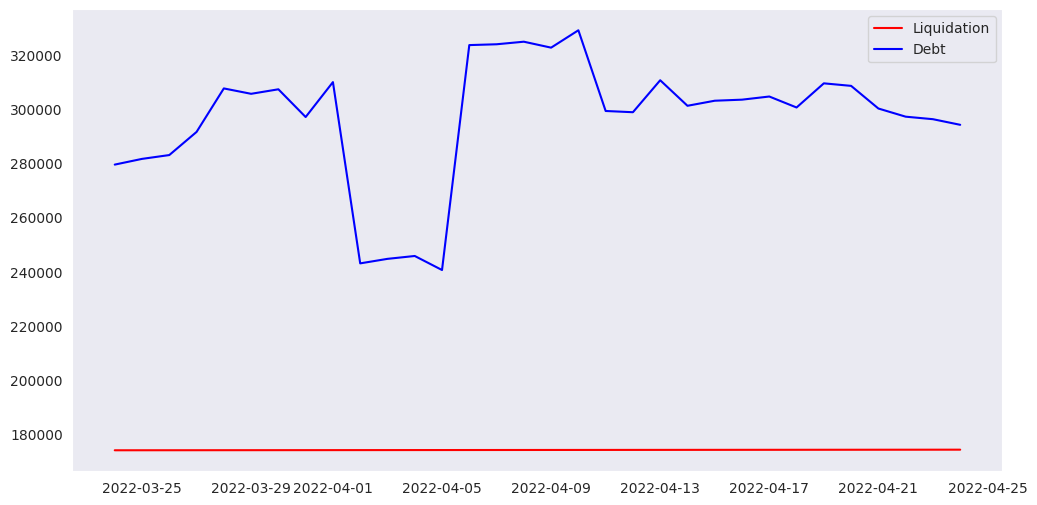

In [508]:
plt.figure(figsize = [12,6])
plt.grid()

X = pd.to_datetime(user_account['Date_Time']).iloc[:-1]#.dt.date.drop_duplicates().reset_index(drop=True)
y = user_account['D_Collateral_DAI'].iloc[:-1]

y2 = user_account['D_Principal'].iloc[:-1] * liquidation_ratio

plt.plot(X, y2, color = 'red', label = "Liquidation")
plt.plot(X, y, color = 'blue', label='Debt')
#plt.scatter(X1, y1, color = 'black', label = 't2')
plt.legend()

plt.show

D_principal is debt, D_collateral is locked ETH-A, D_ART is the amount of stablecoin debt to exchange and sum_col is just I wanna see total ETH in each action. and for plot graph)

# Appendix

In [107]:
pd.DataFrame(res).to_csv('/mnt/SSD/mikhail.evdokimov/mikhailev/miniconda3/michaelpyenv/bin/michael.evdokimov/Coursework/res-df_2022.csv')

In [108]:
res['fn_name'].nunique()

19

In [109]:
res['fn_name'].unique()

array(['file', 'suck', 'move', 'slip', 'ilks', 'fold', 'frob', 'hope',
       'heal', 'flux', 'grab', 'fork', 'sin', 'dai', 'live', 'deny',
       'rely', 'init', 'nope'], dtype=object)

In [110]:
collect = []
aac = res['args']
for i in aac:
  coll = list(i.keys())
  if coll not in collect:
    collect.append(coll)

In [111]:
collect

[['ilk', 'what', 'data'],
 ['u', 'v', 'rad'],
 ['src', 'dst', 'rad'],
 ['ilk', 'usr', 'wad'],
 [''],
 ['i', 'u', 'rate'],
 ['i', 'u', 'v', 'w', 'dink', 'dart'],
 ['usr'],
 ['rad'],
 ['ilk', 'src', 'dst', 'wad'],
 ['what', 'data'],
 ['ilk', 'src', 'dst', 'dink', 'dart'],
 [],
 ['ilk']]

In [112]:

def clean_args(result):

  for i in range(0, len(result)):
    res = result['args'][i]
    res = str(res).replace('\\x00','')
    res = str(res).replace("b'", "'")
    res = str(res).replace("\'", "\"")
  return result


In [113]:
def decode(tx_input):

    index = ['fn_name', 'args', 'timestamp','block_number','transaction_index','trace_address','transaction_hash']
    
    result = contract.decode_function_input(tx_input['input']) #tuple
    fn_name = result[0].fn_name #function name 
    fn_args = result[1]

    #Clean_args
    fn_args = str(fn_args).replace('\\x00','')
    fn_args = str(fn_args).replace("b'", "'")
    fn_args = str(fn_args).replace("\'", "\"")

    block_timestamp = tx_input['block_timestamp']
    block_number = tx_input['block_number']
    transaction_index = tx_input['transaction_index']
    trace_address = tx_input['trace_address']
    transaction_hash = tx_input['transaction_hash']

    return pd.Series(data=(fn_name, fn_args, block_timestamp, block_number,
                           transaction_index, trace_address, transaction_hash), 
                     index=index)

In [114]:
def test(res):

  ilk = res['args'][0].get('ilk', None) #get ค่า value จาก keys ของ dart
  usr = res['args'][0].get('usr', None)
  src = res['args'][0].get('src', None)
  ddw = pd.Series([ilk, usr, src], index=['ilk', 'usr', 'src'])

  return ddw

In [115]:
res_test = res
test(res_test)

ilk    b'ETH-A\x00\x00\x00\x00\x00\x00\x00\x00\x00\x0...
usr                                                 None
src                                                 None
dtype: object

In [116]:
res_test['ilk'] = res_test[['args']].apply(lambda x : x[0].get('ilk', None) ,axis=1)
res_test['usr'] = res_test[['args']].apply(lambda x : x[0].get('usr', None) ,axis=1)

In [117]:
ilk_ethA = df[df['ilk'] ==  '"ETH-A"']
ilk_ethA

usr      ilk           wad  \
0                                             None  "ETH-A"           NaN   
32      0xaC8dE50F2A234b3CF4707b399F297841AabfE44c  "ETH-A"  6.000000e+18   
91                                            None  "ETH-A"  1.930321e+20   
92      0x2a49Eae5CCa3f050eBEC729Cf90CC910fADAf7A2  "ETH-A" -1.930321e+20   
95                                            None  "ETH-A"           NaN   
...                                            ...      ...           ...   
319265                                        None  "ETH-A"  1.234758e+19   
319266  0x2a49Eae5CCa3f050eBEC729Cf90CC910fADAf7A2  "ETH-A" -1.234758e+19   
319269                                        None  "ETH-A"           NaN   
319318                                        None  "ETH-A"           NaN   
319360                                        None  "ETH-A"           NaN   

           i     u     v     w  dink  dart  \
0       None  None  None  None   NaN   NaN   
32      None  None  None  None   NaN   NaN   
91      None  None  None  None   NaN   NaN   
92      None  None  None  None   NaN   NaN   
95      None  None  None  None   NaN   NaN   
...      ...   ...   ...   ...   ...   ...   
319265  None  None  None  None   NaN   NaN   
319266  None  None  None  None   NaN   NaN   
319269  None  None  None  None   NaN   NaN   
319318  None  None  None  None   NaN   NaN   
319360  None  None  None  None   NaN   NaN   

                                               src  \
0                                             None   
32                                            None   
91      0xE6A502daF198a6b7552016f40c9aD13d808383e8   
92                                            None   
95                                            None   
...                                            ...   
319265  0xd42ec2aBE14483ed6bCbEdbbB5635D95a1CccD97   
319266                                        None   
319269                                        None   
319318                                        None   
319360                                        None   

                                               dst  rad  \
0                                             None  NaN   
32                                            None  NaN   
91      0x2a49Eae5CCa3f050eBEC729Cf90CC910fADAf7A2  NaN   
92                                            None  NaN   
95                                            None  NaN   
...                                            ...  ...   
319265  0x2a49Eae5CCa3f050eBEC729Cf90CC910fADAf7A2  NaN   
319266                                        None  NaN   
319269                                        None  NaN   
319318                                        None  NaN   
319360                                        None  NaN   

                                                     what  \
0       b'spot\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00...   
32                                                   None   
91                                                   None   
92                                                   None   
95      b'spot\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00...   
...                                                   ...   
319265                                               None   
319266                                               None   
319269  b'spot\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00...   
319318  b'spot\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00...   
319360  b'spot\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00...   

                                   data  
0       2542027586206896551724137931034  
32                                 None  
91                                 None  
92                                 None  
95      2542027586206896551724137931034  
...                                 ...  
319265                             None  
319266                             None  
319269   733275862068965517241379310344  
319318   733275862068965517241379310344  
319360   7332758

In [118]:
res_test['args'][4]

{'ilk': b'LINK-A\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00',
 'what': b'spot\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00',
 'data': 11911554545454545454545454545}

In [119]:
empty_list = []
a = test1.loc[test1['fn_name'] == 'slip','ilk']
val = a.values[0]
empty_list.append(val)
empty_list

IndexError: index 0 is out of bounds for axis 0 with size 0

# ETH and BTC correlation

In [182]:
import ssl
import pandas as pd
import scipy.stats

# change the ssl state so we do not see an error for https:// content
ssl._create_default_https_context = ssl._create_unverified_context


def main():
    # first we will load the data and receive two lists of change metrics
    btc, eth = load_data_sets()

    # next calculate correlation using Pandas
    calc_pandas_correlation(btc, eth)  # pass lists to function

    # calculate correlation using scipy.stats
    calc_scipy_correlation(btc, eth)


def load_data_sets():
    # read the two data sets into dataframes and then return the dataframes as a Tuple
    btc_df = pd.read_csv("https://www.cryptodatadownload.com/cdd/Gemini_BTCUSD_d.csv", skiprows=1)
    eth_df = pd.read_csv("https://www.cryptodatadownload.com/cdd/Gemini_ETHUSD_d.csv", skiprows=1)

    # calculate the pct change
    btc_df.sort_values('date', inplace=True)  # we sort the values so that oldest are first
    eth_df.sort_values('date', inplace=True)
    btc_df['pct_chg'] = np.log(btc_df['close']).pct_change(periods=1)
    eth_df['pct_chg'] = np.log(eth_df['close']).pct_change(periods=1)
    btc_chg_list = btc_df['pct_chg'].tolist() # convert the percent change column to a list
    eth_chg_list = eth_df['pct_chg'].tolist()  # convert the percent change column to a list

    return btc_chg_list[-90:], eth_chg_list[-90:] # return only the last 90 days of timeseries

def calc_pandas_correlation(btc, eth):
    btc_series = pd.Series(btc)
    eth_series = pd.Series(eth)
    corr = btc_series.corr(eth_series)
    print(f'Correlation pct change using Pandas: {corr}')


def calc_scipy_correlation(btc, eth):
    corr, pval = scipy.stats.pearsonr(btc, eth) # returns tuple of corr, p-value
    print(f'Correlation pct change using Scipy.stats: {corr}')


if __name__ == "__main__":
    main()

Correlation pct change using Pandas: 0.8920592082227646
Correlation pct change using Scipy.stats: 0.8920592082227651


In [201]:
btc, eth = load_data_sets()

In [196]:
btc_df = pd.read_csv("https://www.cryptodatadownload.com/cdd/Gemini_BTCUSD_d.csv", skiprows=1)
eth_df = pd.read_csv("https://www.cryptodatadownload.com/cdd/Gemini_ETHUSD_d.csv", skiprows=1)
eth_df.head()

unix                 date   symbol     open     high      low  \
0  1681257600000  2023-04-12 00:00:00  ETH/USD  1893.35  1933.15  1857.06   
1  1681171200000  2023-04-11 00:00:00  ETH/USD  1911.11  1927.71  1884.28   
2  1681084800000  2023-04-10 00:00:00  ETH/USD  1860.07  1919.87  1848.40   
3  1680998400000  2023-04-09 00:00:00  ETH/USD  1850.03  1874.42  1825.89   
4  1680912000000  2023-04-08 00:00:00  ETH/USD  1865.12  1880.60  1848.40   

     close   Volume ETH    Volume USD  
0  1917.76  3909.615037  7.497703e+06  
1  1893.35  2877.556316  5.448221e+06  
2  1911.11  2730.766133  5.218794e+06  
3  1860.07   736.549317  1.370033e+06  
4  1850.03  1058.112978  1.957541e+06

In [199]:
def calc_pandas_correlation(btc, eth):
    btc_series = btc['close']
    eth_series = eth['close']
    corr = btc_series.corr(eth_series)
    corr_log = np.log(btc['close']).corr(np.log(eth['close']))
    print(f'Correlation pct change using Pandas: {corr}')
    print(f'Log correlation pct change using Pandas: {corr_log}')

In [200]:
calc_pandas_correlation(btc_df, eth_df)

Correlation pct change using Pandas: 0.939036789425622
Log correlation pct change using Pandas: 0.9587389349327134


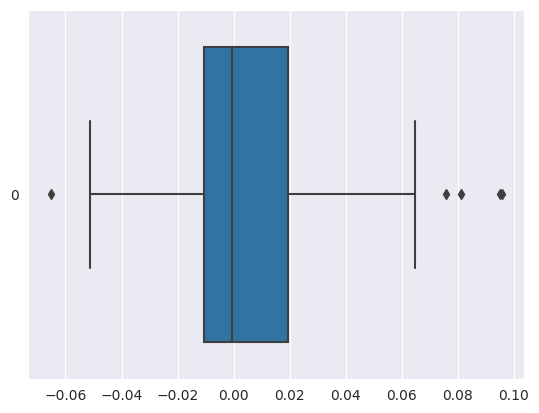

In [166]:
import seaborn as sns
ax = sns.boxplot(data=btc, orient="h")

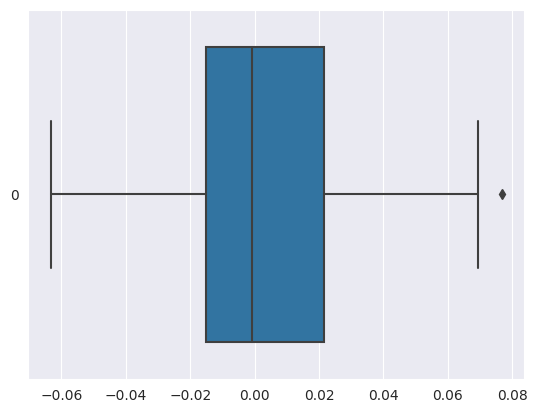

In [167]:
import seaborn as sns
ax = sns.boxplot(data=eth, orient="h")

# Visualize

## Relative changes in closing prices

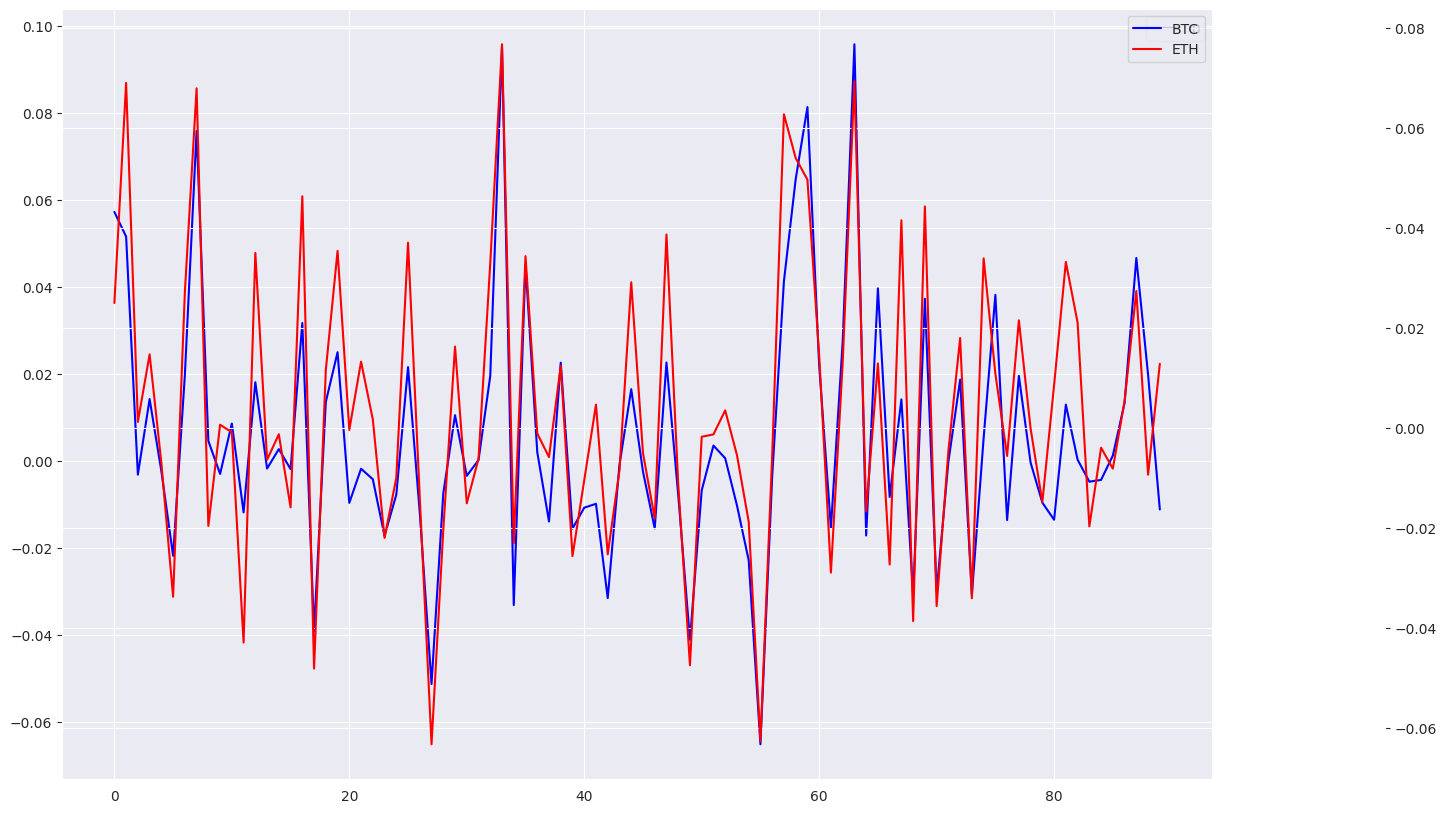

In [174]:
fig, ax1 = plt.subplots(figsize=(20, 10))
ax2 = ax1.twinx()
rspine = ax2.spines['right']
rspine.set_position(('axes', 1.15))
ax2.set_frame_on(True)
ax2.patch.set_visible(False)
fig.subplots_adjust(right=0.7)
pd.DataFrame(btc).plot(ax=ax1, style='b-')
pd.DataFrame(eth).plot(ax=ax2, style='r-')
# legend
ax2.legend([ax1.get_lines()[0],
            ax2.get_lines()[0]],
           ['BTC', 'ETH'])

## Closing price

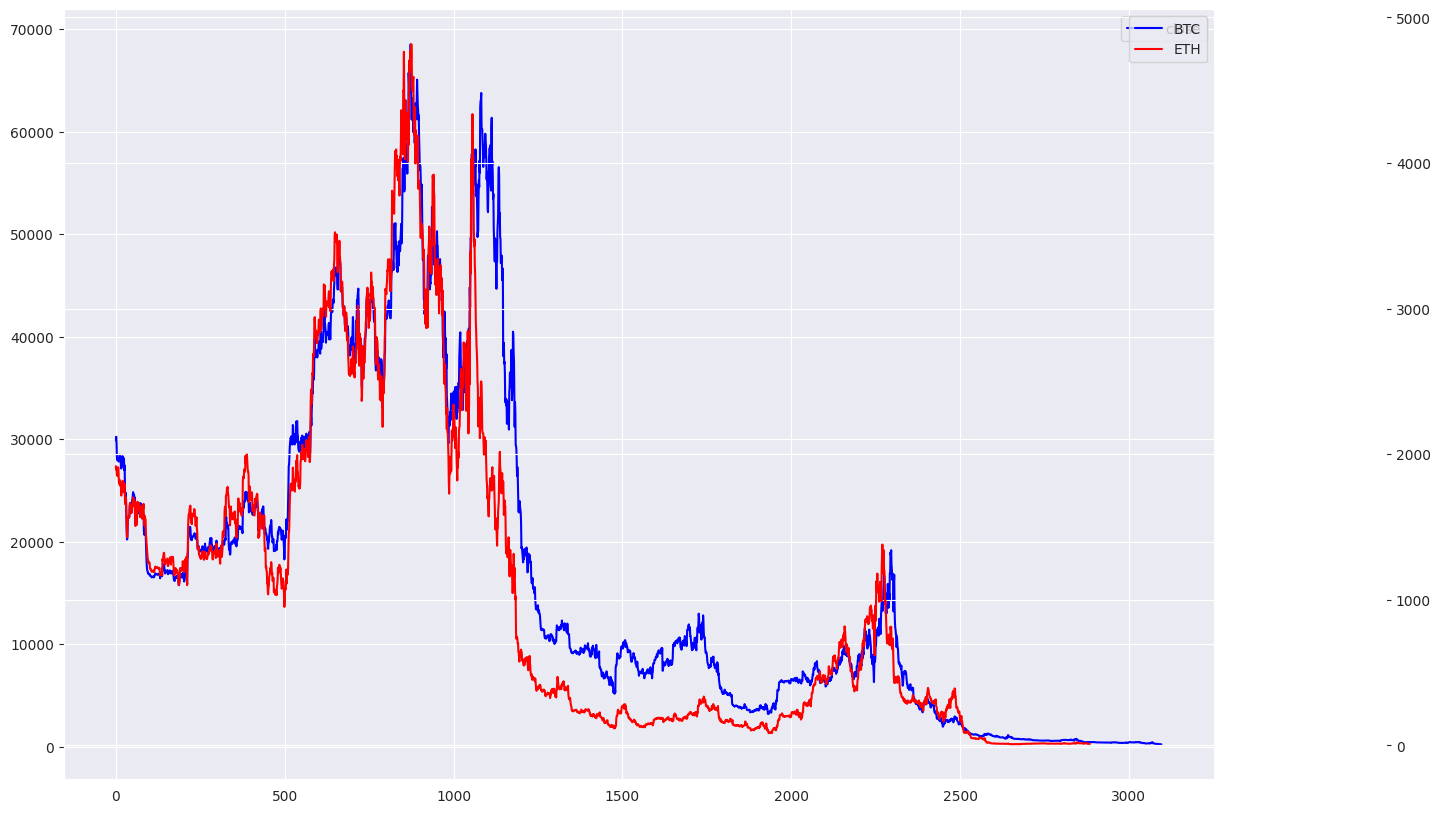

In [204]:
fig, ax1 = plt.subplots(figsize=(20, 10))
ax2 = ax1.twinx()
rspine = ax2.spines['right']
rspine.set_position(('axes', 1.15))
ax2.set_frame_on(True)
ax2.patch.set_visible(False)
fig.subplots_adjust(right=0.7)
pd.DataFrame(btc_df['close']).plot(ax=ax1, style='b-')
pd.DataFrame(eth_df['close']).plot(ax=ax2, style='r-')
# legend
ax2.legend([ax1.get_lines()[0],
            ax2.get_lines()[0]],
           ['BTC', 'ETH'])

## Log closing price

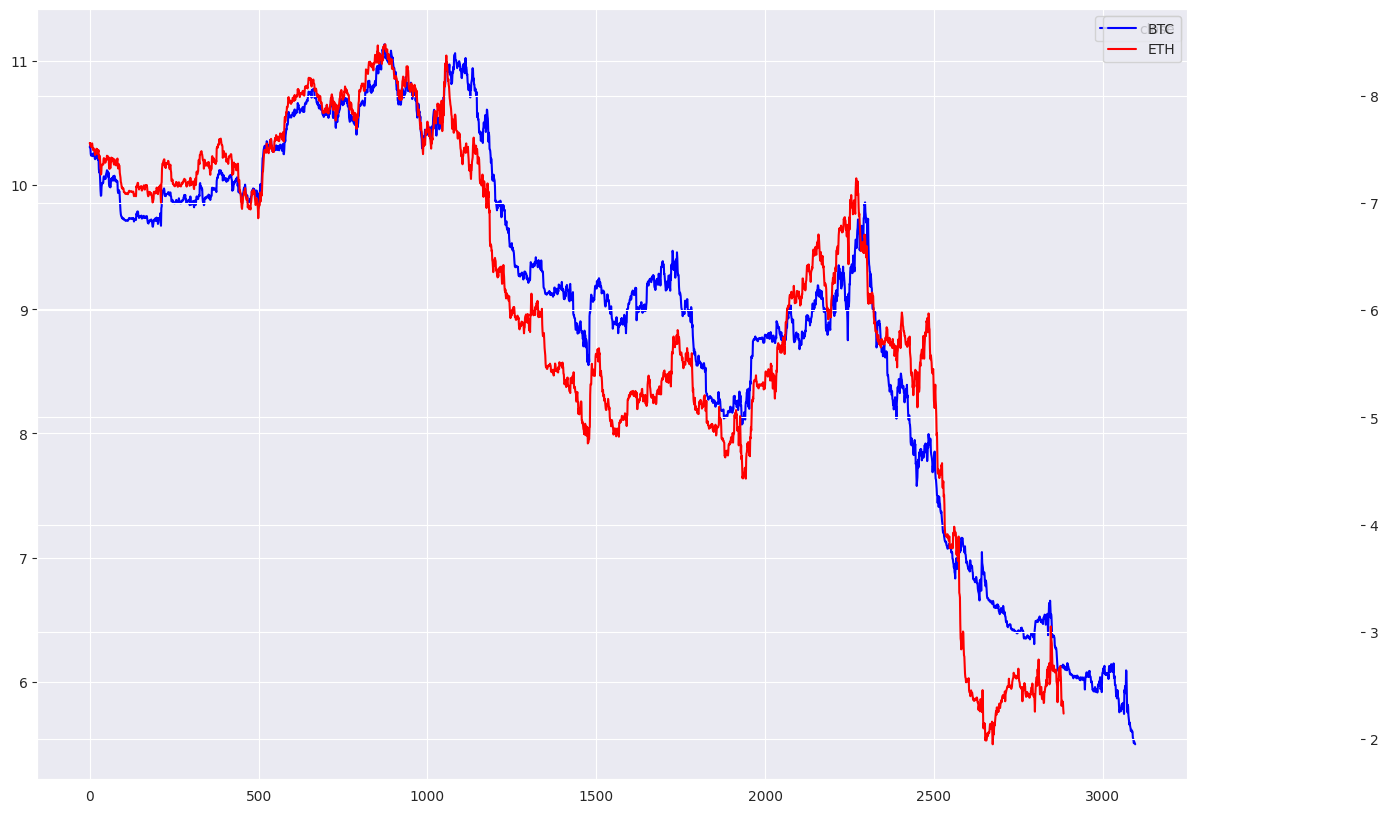

In [206]:
fig, ax1 = plt.subplots(figsize=(20, 10))
ax2 = ax1.twinx()
rspine = ax2.spines['right']
rspine.set_position(('axes', 1.15))
ax2.set_frame_on(True)
ax2.patch.set_visible(False)
fig.subplots_adjust(right=0.7)
pd.DataFrame(np.log(btc_df['close'])).plot(ax=ax1, style='b-')
pd.DataFrame(np.log(eth_df['close'])).plot(ax=ax2, style='r-')
# legend
ax2.legend([ax1.get_lines()[0],
            ax2.get_lines()[0]],
           ['BTC', 'ETH'])

## Correlation of closing prices

In [179]:
# Compute the correlation matrix
corr = df.corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 10))
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, annot=True, fmt = '.4f', mask=mask, center=0, square=True, linewidths=.5)

/tmp/ipykernel_22596/1136669166.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()
/tmp/ipykernel_22596/1136669166.py:4: FutureWarning: In the future `np.bool` will be defined as the corresponding NumPy scalar.
  mask = np.zeros_like(corr, dtype=np.bool)


AttributeError: module 'numpy' has no attribute 'bool'.
`np.bool` was a deprecated alias for the builtin `bool`. To avoid this error in existing code, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
The aliases was originally deprecated in NumPy 1.20; for more details and guidance see the original release note at:
    https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

<function matplotlib.pyplot.show(close=None, block=None)>

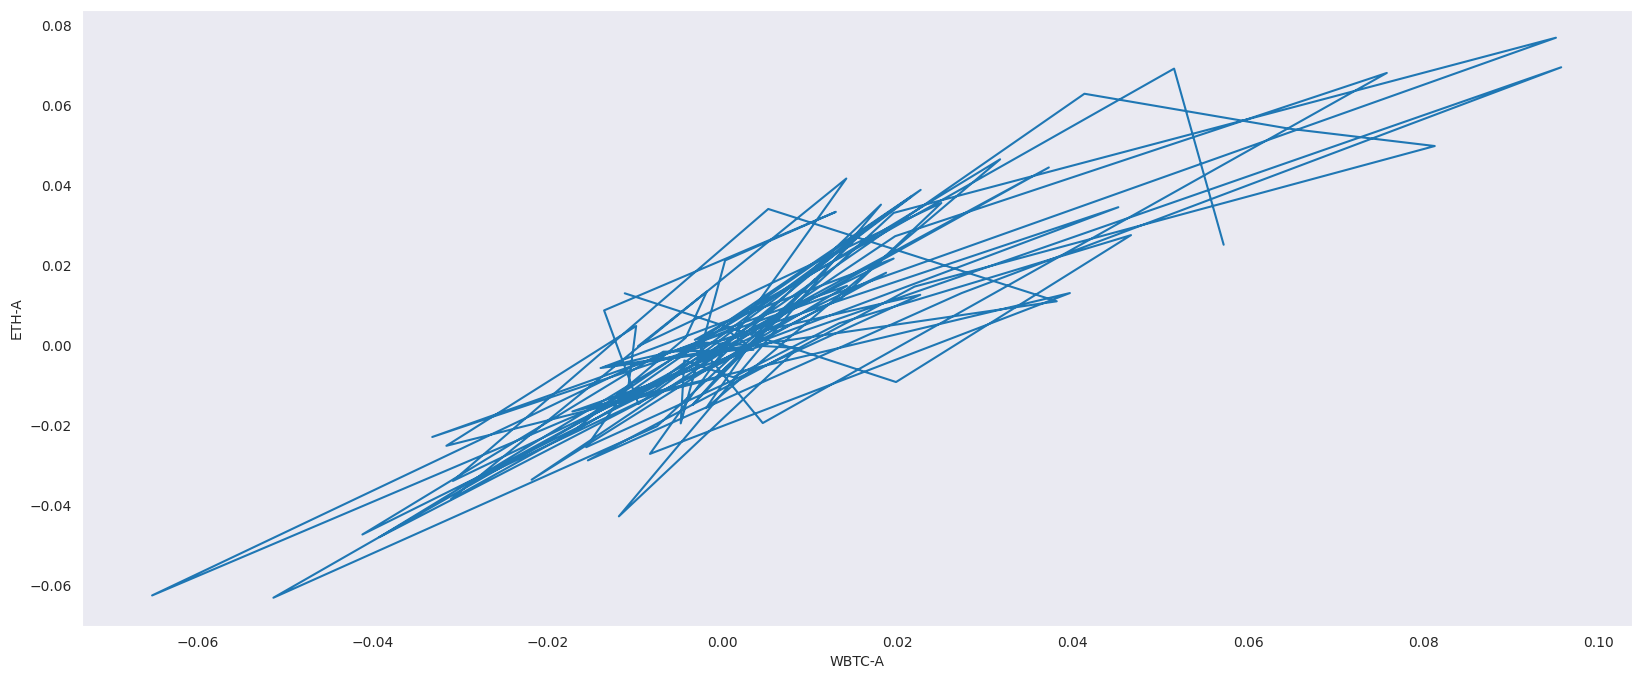

In [164]:
plt.figure(figsize = [20,8])
plt.grid()
plt.plot(btc, eth)
plt.xlabel("WBTC-A")
plt.ylabel("ETH-A")
plt.show

# TODO

- add log corr - Done
- стат проверка гипотез Кульбак
- 3.3 (наивная) Етипа, модель дефолта
- 3.4 как у меня модель
- Проверка гипотезы на броуновское движение, возмжна провекар методом Монте-Карло
-